# Customer Attrition Prediction Model

It has been reported that approximately 33% of clients in the financial wealth management industry have expressed their intention to switch to a different wealth management provider within the next three years.

• We are going to employ machine learning to develop a model for predicting customer attrition for the banking industry.

### Analyzing the outcomes of this model to gain insights into the various factors that contribute to customer attrition.

### Objective:
- To propose effective strategies to decrease attrition rates and enhance customer retention. 

#### Importing libraries

In [1]:
import sweetviz as sv
import pandas as pd # core data wrangling library for mathematical computations
import plotly.express as px #data visualization library
import seaborn as sns  #data visualization library
import matplotlib.pyplot as plt  # plotting library

# For better tables outputs
# pd.options.display.max_rows = None
pd.options.display.max_columns = None


%matplotlib inline
import plotly.graph_objects as go #data visualization library
import datetime  #date and time library
from math import sqrt #maths function for square root of a number
import warnings #disable warning messages
warnings.filterwarnings('ignore')

####  Loading the dataset from the directory

In [2]:
# read csv file
customer_data = pd.read_csv('customer_history_new.csv')
customer_data

,Unnamed: 0,CUSTOMER_AGE_RANGE,CUSTOMER_GENDER,CUSTOMER_EDUCATION_LEVEL,CUSTOMER_URBAN_CODE,CUSTOMER_MARKET_GROUP,CUSTOMER_EMPLOYMENT_STATUS,CUSTOMER_MARITAL_STATUS,CUSTOMER_SUMMARY_TOTAL_AMOUNT_OF_DEPOSITS,CUSTOMER_NUMBER_OF_DEPENDENT_ADULTS,CUSTOMER_NUMBER_OF_DEPENDENT_CHILDREN,CUSTOMER_ANNUAL_INCOME,CUSTOMER_SUMMARY_NUMBER_OF_ACCOUNTS,CUSTOMER_SUMMARY_FUNDS_UNDER_MANAGEMENT,CUSTOMER_SUMMARY_AVERAGE_SENTIMENT_SCORE,CUSTOMER_INTERNET_BANKING_INDICATOR,CUSTOMER_FAMILY_SIZE,NUM_ACCOUNTS_WITH_RISK_TOLERANCE_HIGH,NUM_ACCOUNTS_WITH_RISK_TOLERANCE_LOW,NUM_ACCOUNTS_WITH_RISK_TOLERANCE_MODERATE,NUM_ACCOUNTS_WITH_RISK_TOLERANCE_VERY_LOW,NUM_ACCOUNTS_WITH_INVESTMENT_OBJECTIVE_GROWTH,NUM_ACCOUNTS_WITH_INVESTMENT_OBJECTIVE_INCOME,NUM_ACCOUNTS_WITH_INVESTMENT_OBJECTIVE_PLANNING,NUM_ACCOUNTS_WITH_INVESTMENT_OBJECTIVE_SECURE_GROWTH,NUM_ACCOUNTS_WITH_INVESTMENT_OBJECTIVE_SECURITY,CUSTOMER_SUMMARY_TOTAL_AMOUNT_OF_DEPOSITS.1,CUSTOMER_SUMMARY_FINANCIAL_ASSETS,CUSTOMER_SUMMARY_TOTAL_AMOUNT_OF_MARKET_CHANGE,CUSTOMER_SUMMARY_NUMBER_OF_TRANSACTIONS,CUSTOMER_SUMMARY_FUNDS_UNDER_MANAGEMENT.1,CUSTOMER_SUMMARY_NON_FINANCIAL_ASSETS,CUSTOMER_SUMMARY_NUMBER_OF_MOBILE_LOGINS,CUSTOMER_SUMMARY_NUMBER_OF_LOGINS,CUSTOMER_CUSTOMER_ID,CUSTOMER_SUMMARY_END_DATE,CUSTOMER_SUMMARY_START_DATE,CUSTOMER_STATUS,CUSTOMER_SUMMARY_FUNDS_UNDER_MANAGEMENT.2,CUSTOMER_EFFECTIVE_DATE,CUSTOMER_RELATIONSHIP_START_DATE
0,0,40 to 55,Male,College,City,Accumulating,Employed,Married,2034.610329,0,2,550000.0,4,180000.0,3,1,4,NaN,NaN,3.0,1.0,NaN,NaN,1.0,2.0,1.0,2034.610329,0.0,4019.183857,2,180000.0,0.0,99,99,1024,2018-09-30,2018-09-01,Active,180000.0,2016-07-23,2016-07-23
1,1,40 to 55,Male,College,City,Accumulating,Employed,Married,1656.750260,0,2,550000.0,4,180000.0,0,1,4,NaN,NaN,3.0,1.0,NaN,NaN,1.0,2.0,1.0,1656.750260,0.0,3498.384916,2,180000.0,0.0,99,99,1024,2016-12-31,2016-12-01,Active,180000.0,2016-07-23,2016-07-23
2,2,40 to 55,Male,College,City,Accumulating,Employed,Married,954.949321,0,2,550000.0,4,180000.0,4,1,4,NaN,NaN,3.0,1.0,NaN,NaN,1.0,2.0,1.0,954.949321,0.0,2000.247375,2,180000.0,0.0,99,99,1024,2017-09-30,2017-09-01,Active,180000.0,2016-07-23,2016-07-23
3,3,40 to 55,Male,College,City,Accumulating,Employed,Married,3386.882010,0,2,550000.0,4,180000.0,0,1,4,NaN,NaN,3.0,1.0,NaN,NaN,1.0,2.0,1.0,3386.882010,0.0,2185.212288,2,180000.0,0.0,99,99,1024,2016-10-31,2016-10-01,Active,180000.0,2016-07-23,2016-07-23
4,4,40 to 55,Male,College,City,Accumulating,Employed,Married,836.334713,0,2,550000.0,4,180000.0,0,1,4,NaN,NaN,3.0,1.0,NaN,NaN,1.0,2.0,1.0,836.334713,0.0,-2.537837,1,180000.0,0.0,99,99,1024,2017-07-31,2017-07-01,Active,180000.0,2016-07-23,2016-07-23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19246,19246,65 and over,Female,Professional,Urban,Gifting,Selfemployed,Divorced,1101.651965,0,0,235000.0,3,1250000.0,4,0,1,NaN,2.0,1.0,NaN,NaN,2.0,1.0,NaN,NaN,1101.651965,0.0,8483.864581,2,1250000.0,0.0,99,99,1532,2018-09-30,2018-09-01,Active,1250000.0,2018-07-24,2018-07-24
19247,19247,65 and over,Female,Professional,Urban,Gifting,Selfemployed,Divorced,750.339350,0,0,235000.0,3,1250000.0,2,0,1,NaN,2.0,1.0,NaN,NaN,2.0,1.0,NaN,NaN,750.339350,0.0,9337.569552,1,1250000.0,0.0,99,99,1532,2018-08-31,2018-08-01,Active,1250000.0,2018-07-24,2018-07-24
19248,19248,65 and over,Female,PhD,Urban,Accumulating,Retired,Single,1549.408697,0,0,100000.0,3,180000.0,5,1,1,NaN,2.0,1.0,NaN,NaN,2.0,1.0,NaN,NaN,1549.408697,0.0,972.667717,1,180000.0,0.0,99,99,1071,2018-09-30,2018-09-01,Active,180000.0,2018-09-02,2018-09-02
19249,19249,40 to 55,Male,College,City,Accumulating,Employed,Married,973.619115,0,2,250000.0,3,1250000.0,1,1,4,1.0,NaN,2.0,NaN,1.0,NaN,2.0,NaN,NaN,973.619115,0.0,2942.904565,1,1250000.0,0.0,99,99,1385,2018-09-30,2018-09-01,Active,1250000.0,2018-09-05,2018-09-05


### Perform Some Data Preprocessing
#### Generating data profiling report for the datasets using sweetviz
- This is because it is used for performing exploratory data analysis (EDA) in a quick and visual manner

In [3]:
# Generate the customer data report
report = sv.analyze(customer_data)
report.show_html(filepath="customer_data.html", open_browser=False, layout='widescreen', scale=0.8)

                                             |      | [  0%]   00:00 -> (? left)

Report customer_data.html was generated.


In [4]:
# Print the shape of the DataFrame to understand its dimensions (rows, columns)
print(customer_data.shape)

(19251, 41)


In [5]:
# Check and remove duplicate rows from the dataset
print('Shape before removing duplicate rows:', customer_data.shape)
customer_data.drop_duplicates(subset='CUSTOMER_CUSTOMER_ID', keep='last')
print('Shape after removing duplicate rows:', customer_data.shape)

Shape before removing duplicate rows: (19251, 41)
Shape after removing duplicate rows: (19251, 41)


It can be seen that there are no duplicate in the dataset

In [6]:
# Generate descriptive statistics
customer_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,19251.0,9625.000000,5557.429352,0.000000,4812.500000,9625.000000,14437.500000,1.925000e+04
CUSTOMER_SUMMARY_TOTAL_AMOUNT_OF_DEPOSITS,19251.0,1067.660024,658.477301,0.000000,588.057311,958.379251,1446.427778,4.510451e+03
CUSTOMER_NUMBER_OF_DEPENDENT_ADULTS,19251.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
CUSTOMER_NUMBER_OF_DEPENDENT_CHILDREN,19251.0,0.982235,0.829706,0.000000,0.000000,1.000000,2.000000,2.000000e+00
CUSTOMER_ANNUAL_INCOME,19251.0,220653.472547,132121.958480,50000.000000,115000.000000,185000.000000,315000.000000,7.400000e+05
CUSTOMER_SUMMARY_NUMBER_OF_ACCOUNTS,19251.0,2.611085,0.820364,1.000000,2.000000,3.000000,3.000000,4.000000e+00
CUSTOMER_SUMMARY_FUNDS_UNDER_MANAGEMENT,19251.0,500158.952782,462816.915001,80000.000000,150000.000000,300000.000000,750000.000000,1.250000e+06
CUSTOMER_SUMMARY_AVERAGE_SENTIMENT_SCORE,19251.0,2.185133,1.713327,0.000000,1.000000,2.000000,4.000000,5.000000e+00
CUSTOMER_INTERNET_BANKING_INDICATOR,19251.0,0.517687,0.499700,0.000000,0.000000,1.000000,1.000000,1.000000e+00
CUSTOMER_FAMILY_SIZE,19251.0,2.648226,1.152519,1.000000,2.000000,3.000000,4.000000,4.000000e+00


In [7]:
# Display the first few rows of the DataFrame for a quick overview
customer_data.head()

,Unnamed: 0,CUSTOMER_AGE_RANGE,CUSTOMER_GENDER,CUSTOMER_EDUCATION_LEVEL,CUSTOMER_URBAN_CODE,CUSTOMER_MARKET_GROUP,CUSTOMER_EMPLOYMENT_STATUS,CUSTOMER_MARITAL_STATUS,CUSTOMER_SUMMARY_TOTAL_AMOUNT_OF_DEPOSITS,CUSTOMER_NUMBER_OF_DEPENDENT_ADULTS,CUSTOMER_NUMBER_OF_DEPENDENT_CHILDREN,CUSTOMER_ANNUAL_INCOME,CUSTOMER_SUMMARY_NUMBER_OF_ACCOUNTS,CUSTOMER_SUMMARY_FUNDS_UNDER_MANAGEMENT,CUSTOMER_SUMMARY_AVERAGE_SENTIMENT_SCORE,CUSTOMER_INTERNET_BANKING_INDICATOR,CUSTOMER_FAMILY_SIZE,NUM_ACCOUNTS_WITH_RISK_TOLERANCE_HIGH,NUM_ACCOUNTS_WITH_RISK_TOLERANCE_LOW,NUM_ACCOUNTS_WITH_RISK_TOLERANCE_MODERATE,NUM_ACCOUNTS_WITH_RISK_TOLERANCE_VERY_LOW,NUM_ACCOUNTS_WITH_INVESTMENT_OBJECTIVE_GROWTH,NUM_ACCOUNTS_WITH_INVESTMENT_OBJECTIVE_INCOME,NUM_ACCOUNTS_WITH_INVESTMENT_OBJECTIVE_PLANNING,NUM_ACCOUNTS_WITH_INVESTMENT_OBJECTIVE_SECURE_GROWTH,NUM_ACCOUNTS_WITH_INVESTMENT_OBJECTIVE_SECURITY,CUSTOMER_SUMMARY_TOTAL_AMOUNT_OF_DEPOSITS.1,CUSTOMER_SUMMARY_FINANCIAL_ASSETS,CUSTOMER_SUMMARY_TOTAL_AMOUNT_OF_MARKET_CHANGE,CUSTOMER_SUMMARY_NUMBER_OF_TRANSACTIONS,CUSTOMER_SUMMARY_FUNDS_UNDER_MANAGEMENT.1,CUSTOMER_SUMMARY_NON_FINANCIAL_ASSETS,CUSTOMER_SUMMARY_NUMBER_OF_MOBILE_LOGINS,CUSTOMER_SUMMARY_NUMBER_OF_LOGINS,CUSTOMER_CUSTOMER_ID,CUSTOMER_SUMMARY_END_DATE,CUSTOMER_SUMMARY_START_DATE,CUSTOMER_STATUS,CUSTOMER_SUMMARY_FUNDS_UNDER_MANAGEMENT.2,CUSTOMER_EFFECTIVE_DATE,CUSTOMER_RELATIONSHIP_START_DATE
0,0,40 to 55,Male,College,City,Accumulating,Employed,Married,2034.610329,0,2,550000.0,4,180000.0,3,1,4,NaN,NaN,3.0,1.0,NaN,NaN,1.0,2.0,1.0,2034.610329,0.0,4019.183857,2,180000.0,0.0,99,99,1024,2018-09-30,2018-09-01,Active,180000.0,2016-07-23,2016-07-23
1,1,40 to 55,Male,College,City,Accumulating,Employed,Married,1656.750260,0,2,550000.0,4,180000.0,0,1,4,NaN,NaN,3.0,1.0,NaN,NaN,1.0,2.0,1.0,1656.750260,0.0,3498.384916,2,180000.0,0.0,99,99,1024,2016-12-31,2016-12-01,Active,180000.0,2016-07-23,2016-07-23
2,2,40 to 55,Male,College,City,Accumulating,Employed,Married,954.949321,0,2,550000.0,4,180000.0,4,1,4,NaN,NaN,3.0,1.0,NaN,NaN,1.0,2.0,1.0,954.949321,0.0,2000.247375,2,180000.0,0.0,99,99,1024,2017-09-30,2017-09-01,Active,180000.0,2016-07-23,2016-07-23
3,3,40 to 55,Male,College,City,Accumulating,Employed,Married,3386.882010,0,2,550000.0,4,180000.0,0,1,4,NaN,NaN,3.0,1.0,NaN,NaN,1.0,2.0,1.0,3386.882010,0.0,2185.212288,2,180000.0,0.0,99,99,1024,2016-10-31,2016-10-01,Active,180000.0,2016-07-23,2016-07-23
4,4,40 to 55,Male,College,City,Accumulating,Employed,Married,836.334713,0,2,550000.0,4,180000.0,0,1,4,NaN,NaN,3.0,1.0,NaN,NaN,1.0,2.0,1.0,836.334713,0.0,-2.537837,1,180000.0,0.0,99,99,1024,2017-07-31,2017-07-01,Active,180000.0,2016-07-23,2016-07-23


In [8]:
# Checking the info summary of the customer_data 
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19251 entries, 0 to 19250
Data columns (total 41 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Unnamed: 0                                            19251 non-null  int64  
 1   CUSTOMER_AGE_RANGE                                    19251 non-null  object 
 2   CUSTOMER_GENDER                                       19251 non-null  object 
 3   CUSTOMER_EDUCATION_LEVEL                              19251 non-null  object 
 4   CUSTOMER_URBAN_CODE                                   19251 non-null  object 
 5   CUSTOMER_MARKET_GROUP                                 19251 non-null  object 
 6   CUSTOMER_EMPLOYMENT_STATUS                            19251 non-null  object 
 7   CUSTOMER_MARITAL_STATUS                               19251 non-null  object 
 8   CUSTOMER_SUMMARY_TOTAL_AMOUNT_OF_DEPOSITS             19

### Base on the info summary of the data,  it can be seen that some data cleaning and preprocessing needs to be done and a few are as follows:
- **1. Drop unnecessary columns:** 
    -The 'Unnamed: 0' column seems to be an index column and can be dropped as it does not provide any meaningful information. 
    - either CUSTOMER_SUMMARY_NUMBER_OF_MOBILE_LOGINS or CUSTOMER_SUMMARY_NUMBER_OF_LOGINS since they all have the same data and it's contstant so we can drop it
    - CUSTOMER_SUMMARY_FINANCIAL_ASSETS, CUSTOMER_SUMMARY_NON_FINANCIAL_ASSETS, CUSTOMER_NUMBER_OF_DEPENDENT_ADULTS since they contain no data from the graphical representation
    - CUSTOMER_SUMMARY_FUNDS_UNDER_MANAGEMENT.2 and rename CUSTOMER_SUMMARY_FUNDS_UNDER_MANAGEMENT.1 as CUSTOMER_SUMMARY_FUNDS_UNDER_MANAGEMENT since they seem to contain the same data
    - CUSTOMER_SUMMARY_TOTAL_AMOUNT_OF_DEPOSITS.1: This feature has the same statistics as CUSTOMER_SUMMARY_TOTAL_AMOUNT_OF_DEPOSITS
- **2. Missing values:** There are several columns with missing values, such as 'NUM_ACCOUNTS_WITH_RISK_TOLERANCE_HIGH', 'NUM_ACCOUNTS_WITH_RISK_TOLERANCE_LOW', NUM_ACCOUNTS_WITH_RISK_TOLERANCE_MODERATE etc
- **3. Date columns:** There are several date columns like 'CUSTOMER_SUMMARY_END_DATE', 'CUSTOMER_SUMMARY_START_DATE', etc. These columns can be converted to datetime format for easier manipulation and analysis.
- **4. Check for outliers:** Examine the numerical columns for any outliers that may need to be handled. Outliers can be detected using statistical methods or visualization techniques like box plots.
- **5. Categorical variables encoding:** Some columns contain categorical variables, such as 'CUSTOMER_AGE_RANGE', 'CUSTOMER_GENDER', etc. can converted into numerical representations using techniques like one-hot encoding or label encoding.
- **6. Uppercase Conversion:** Covert all categorical data into upper case to ensure consistency

**Dropping columns**

In [9]:
customer_data.columns

Index(['Unnamed: 0', 'CUSTOMER_AGE_RANGE', 'CUSTOMER_GENDER',
       'CUSTOMER_EDUCATION_LEVEL', 'CUSTOMER_URBAN_CODE',
       'CUSTOMER_MARKET_GROUP', 'CUSTOMER_EMPLOYMENT_STATUS',
       'CUSTOMER_MARITAL_STATUS', 'CUSTOMER_SUMMARY_TOTAL_AMOUNT_OF_DEPOSITS',
       'CUSTOMER_NUMBER_OF_DEPENDENT_ADULTS',
       'CUSTOMER_NUMBER_OF_DEPENDENT_CHILDREN', 'CUSTOMER_ANNUAL_INCOME',
       'CUSTOMER_SUMMARY_NUMBER_OF_ACCOUNTS',
       'CUSTOMER_SUMMARY_FUNDS_UNDER_MANAGEMENT',
       'CUSTOMER_SUMMARY_AVERAGE_SENTIMENT_SCORE',
       'CUSTOMER_INTERNET_BANKING_INDICATOR', 'CUSTOMER_FAMILY_SIZE',
       'NUM_ACCOUNTS_WITH_RISK_TOLERANCE_HIGH',
       'NUM_ACCOUNTS_WITH_RISK_TOLERANCE_LOW',
       'NUM_ACCOUNTS_WITH_RISK_TOLERANCE_MODERATE',
       'NUM_ACCOUNTS_WITH_RISK_TOLERANCE_VERY_LOW',
       'NUM_ACCOUNTS_WITH_INVESTMENT_OBJECTIVE_GROWTH',
       'NUM_ACCOUNTS_WITH_INVESTMENT_OBJECTIVE_INCOME',
       'NUM_ACCOUNTS_WITH_INVESTMENT_OBJECTIVE_PLANNING',
       'NUM_ACCOUNTS_WITH_INVESTM

In [10]:
# Drop the 'Unnamed: 0' column
customer_data.drop('Unnamed: 0', axis=1, inplace=True)

# Compare and drop either CUSTOMER_SUMMARY_NUMBER_OF_MOBILE_LOGINS or CUSTOMER_SUMMARY_NUMBER_OF_LOGINS 
# Drop them because they contain constant value
if (customer_data['CUSTOMER_SUMMARY_NUMBER_OF_MOBILE_LOGINS'] == customer_data['CUSTOMER_SUMMARY_NUMBER_OF_LOGINS']).all():
    customer_data.drop('CUSTOMER_SUMMARY_NUMBER_OF_MOBILE_LOGINS', axis=1, inplace=True)
    customer_data.drop('CUSTOMER_SUMMARY_NUMBER_OF_LOGINS', axis=1, inplace=True)

# Compare and drop either CUSTOMER_SUMMARY_FUNDS_UNDER_MANAGEMENT.2 or CUSTOMER_SUMMARY_FUNDS_UNDER_MANAGEMENT.1
if (customer_data['CUSTOMER_SUMMARY_FUNDS_UNDER_MANAGEMENT.2'] == customer_data['CUSTOMER_SUMMARY_FUNDS_UNDER_MANAGEMENT.1']).all():
    customer_data.drop('CUSTOMER_SUMMARY_FUNDS_UNDER_MANAGEMENT.2', axis=1, inplace=True)

# Drop the original CUSTOMER_SUMMARY_FUNDS_UNDER_MANAGEMENT column
customer_data.drop('CUSTOMER_SUMMARY_FUNDS_UNDER_MANAGEMENT', axis=1, inplace=True)

# Rename CUSTOMER_SUMMARY_FUNDS_UNDER_MANAGEMENT.1 to CUSTOMER_SUMMARY_FUNDS_UNDER_MANAGEMENT
customer_data.rename(columns={'CUSTOMER_SUMMARY_FUNDS_UNDER_MANAGEMENT.1': 'CUSTOMER_SUMMARY_FUNDS_UNDER_MANAGEMENT'}, inplace=True)

# Compare and drop either CUSTOMER_SUMMARY_TOTAL_AMOUNT_OF_DEPOSITS or CUSTOMER_SUMMARY_TOTAL_AMOUNT_OF_DEPOSITS.1
if (customer_data['CUSTOMER_SUMMARY_TOTAL_AMOUNT_OF_DEPOSITS'] == customer_data['CUSTOMER_SUMMARY_TOTAL_AMOUNT_OF_DEPOSITS.1']).all():
    customer_data.drop('CUSTOMER_SUMMARY_TOTAL_AMOUNT_OF_DEPOSITS.1', axis=1, inplace=True)

# drop columns CUSTOMER_SUMMARY_FINANCIAL_ASSETS, 
# CUSTOMER_SUMMARY_NON_FINANCIAL_ASSETS and  CUSTOMER_NUMBER_OF_DEPENDENT_ADULTS
columns_to_drop = ['CUSTOMER_SUMMARY_FINANCIAL_ASSETS', 
                   'CUSTOMER_SUMMARY_NON_FINANCIAL_ASSETS', 
                   'CUSTOMER_NUMBER_OF_DEPENDENT_ADULTS']

# Drop the specified columns
customer_data.drop(columns_to_drop, axis=1, inplace=True)

#updating dataframe
customer_data = customer_data

# print updated dataframe    
customer_data.columns

Index(['CUSTOMER_AGE_RANGE', 'CUSTOMER_GENDER', 'CUSTOMER_EDUCATION_LEVEL',
       'CUSTOMER_URBAN_CODE', 'CUSTOMER_MARKET_GROUP',
       'CUSTOMER_EMPLOYMENT_STATUS', 'CUSTOMER_MARITAL_STATUS',
       'CUSTOMER_SUMMARY_TOTAL_AMOUNT_OF_DEPOSITS',
       'CUSTOMER_NUMBER_OF_DEPENDENT_CHILDREN', 'CUSTOMER_ANNUAL_INCOME',
       'CUSTOMER_SUMMARY_NUMBER_OF_ACCOUNTS',
       'CUSTOMER_SUMMARY_AVERAGE_SENTIMENT_SCORE',
       'CUSTOMER_INTERNET_BANKING_INDICATOR', 'CUSTOMER_FAMILY_SIZE',
       'NUM_ACCOUNTS_WITH_RISK_TOLERANCE_HIGH',
       'NUM_ACCOUNTS_WITH_RISK_TOLERANCE_LOW',
       'NUM_ACCOUNTS_WITH_RISK_TOLERANCE_MODERATE',
       'NUM_ACCOUNTS_WITH_RISK_TOLERANCE_VERY_LOW',
       'NUM_ACCOUNTS_WITH_INVESTMENT_OBJECTIVE_GROWTH',
       'NUM_ACCOUNTS_WITH_INVESTMENT_OBJECTIVE_INCOME',
       'NUM_ACCOUNTS_WITH_INVESTMENT_OBJECTIVE_PLANNING',
       'NUM_ACCOUNTS_WITH_INVESTMENT_OBJECTIVE_SECURE_GROWTH',
       'NUM_ACCOUNTS_WITH_INVESTMENT_OBJECTIVE_SECURITY',
       'CUSTOMER_SUMMA

In [11]:
# Convert date columns from string to datetime format for easier manipulation

# List of date column names
date_columns = ['CUSTOMER_SUMMARY_END_DATE', 'CUSTOMER_SUMMARY_START_DATE', 'CUSTOMER_EFFECTIVE_DATE', 'CUSTOMER_RELATIONSHIP_START_DATE']

# Convert date columns to datetime format
customer_data[date_columns] = customer_data[date_columns].apply(pd.to_datetime)

In [12]:
customer_data.dtypes

CUSTOMER_AGE_RANGE                                              object
CUSTOMER_GENDER                                                 object
CUSTOMER_EDUCATION_LEVEL                                        object
CUSTOMER_URBAN_CODE                                             object
CUSTOMER_MARKET_GROUP                                           object
CUSTOMER_EMPLOYMENT_STATUS                                      object
CUSTOMER_MARITAL_STATUS                                         object
CUSTOMER_SUMMARY_TOTAL_AMOUNT_OF_DEPOSITS                      float64
CUSTOMER_NUMBER_OF_DEPENDENT_CHILDREN                            int64
CUSTOMER_ANNUAL_INCOME                                         float64
CUSTOMER_SUMMARY_NUMBER_OF_ACCOUNTS                              int64
CUSTOMER_SUMMARY_AVERAGE_SENTIMENT_SCORE                         int64
CUSTOMER_INTERNET_BANKING_INDICATOR                              int64
CUSTOMER_FAMILY_SIZE                                             int64
NUM_AC

**Dividing the columns into numeric and categorical for further preprocessing**

In [13]:
import numpy as np
# Define the columns that are categorical
categorical_cols = [
    'CUSTOMER_AGE_RANGE',
    'CUSTOMER_GENDER',
    'CUSTOMER_EDUCATION_LEVEL',
    'CUSTOMER_URBAN_CODE',
    'CUSTOMER_MARKET_GROUP',
    'CUSTOMER_EMPLOYMENT_STATUS',
    'CUSTOMER_MARITAL_STATUS',
    'CUSTOMER_STATUS'
]

# Initialize an empty list to store the numerical columns
numerical_cols = []

# Iterate over all columns in the DataFrame
for col in customer_data.columns:
    if col not in categorical_cols and col not in date_columns:
        numerical_cols.append(col)

# Print the grouped categorical column names
print("Categorical columns:")
print("-------------------")
for col in categorical_cols:
    print(col)

# Print the grouped numerical column names
print("   ")
print("Numerical columns:")
print("------------------")
for col in numerical_cols:
    print(col)

Categorical columns:
-------------------
CUSTOMER_AGE_RANGE
CUSTOMER_GENDER
CUSTOMER_EDUCATION_LEVEL
CUSTOMER_URBAN_CODE
CUSTOMER_MARKET_GROUP
CUSTOMER_EMPLOYMENT_STATUS
CUSTOMER_MARITAL_STATUS
CUSTOMER_STATUS
   
Numerical columns:
------------------
CUSTOMER_SUMMARY_TOTAL_AMOUNT_OF_DEPOSITS
CUSTOMER_NUMBER_OF_DEPENDENT_CHILDREN
CUSTOMER_ANNUAL_INCOME
CUSTOMER_SUMMARY_NUMBER_OF_ACCOUNTS
CUSTOMER_SUMMARY_AVERAGE_SENTIMENT_SCORE
CUSTOMER_INTERNET_BANKING_INDICATOR
CUSTOMER_FAMILY_SIZE
NUM_ACCOUNTS_WITH_RISK_TOLERANCE_HIGH
NUM_ACCOUNTS_WITH_RISK_TOLERANCE_LOW
NUM_ACCOUNTS_WITH_RISK_TOLERANCE_MODERATE
NUM_ACCOUNTS_WITH_RISK_TOLERANCE_VERY_LOW
NUM_ACCOUNTS_WITH_INVESTMENT_OBJECTIVE_GROWTH
NUM_ACCOUNTS_WITH_INVESTMENT_OBJECTIVE_INCOME
NUM_ACCOUNTS_WITH_INVESTMENT_OBJECTIVE_PLANNING
NUM_ACCOUNTS_WITH_INVESTMENT_OBJECTIVE_SECURE_GROWTH
NUM_ACCOUNTS_WITH_INVESTMENT_OBJECTIVE_SECURITY
CUSTOMER_SUMMARY_TOTAL_AMOUNT_OF_MARKET_CHANGE
CUSTOMER_SUMMARY_NUMBER_OF_TRANSACTIONS
CUSTOMER_SUMMARY_FUNDS_U

### Working on Categorical features

In [14]:
customer_data[categorical_cols].head()

,CUSTOMER_AGE_RANGE,CUSTOMER_GENDER,CUSTOMER_EDUCATION_LEVEL,CUSTOMER_URBAN_CODE,CUSTOMER_MARKET_GROUP,CUSTOMER_EMPLOYMENT_STATUS,CUSTOMER_MARITAL_STATUS,CUSTOMER_STATUS
0,40 to 55,Male,College,City,Accumulating,Employed,Married,Active
1,40 to 55,Male,College,City,Accumulating,Employed,Married,Active
2,40 to 55,Male,College,City,Accumulating,Employed,Married,Active
3,40 to 55,Male,College,City,Accumulating,Employed,Married,Active
4,40 to 55,Male,College,City,Accumulating,Employed,Married,Active


In [15]:
# converting all categorical data into Uppercase
customer_data[categorical_cols] = customer_data[categorical_cols].applymap(str.upper)
customer_data[categorical_cols].head()

,CUSTOMER_AGE_RANGE,CUSTOMER_GENDER,CUSTOMER_EDUCATION_LEVEL,CUSTOMER_URBAN_CODE,CUSTOMER_MARKET_GROUP,CUSTOMER_EMPLOYMENT_STATUS,CUSTOMER_MARITAL_STATUS,CUSTOMER_STATUS
0,40 TO 55,MALE,COLLEGE,CITY,ACCUMULATING,EMPLOYED,MARRIED,ACTIVE
1,40 TO 55,MALE,COLLEGE,CITY,ACCUMULATING,EMPLOYED,MARRIED,ACTIVE
2,40 TO 55,MALE,COLLEGE,CITY,ACCUMULATING,EMPLOYED,MARRIED,ACTIVE
3,40 TO 55,MALE,COLLEGE,CITY,ACCUMULATING,EMPLOYED,MARRIED,ACTIVE
4,40 TO 55,MALE,COLLEGE,CITY,ACCUMULATING,EMPLOYED,MARRIED,ACTIVE


In [16]:
# Check for missing values in categorical columns
print("\nMissing values in categorical columns:")
print('--------------------------------------')
for col in categorical_cols:
    missing_values = customer_data[col].isnull().sum()
    print(f"{col}: {missing_values} missing value(s)")


Missing values in categorical columns:
--------------------------------------
CUSTOMER_AGE_RANGE: 0 missing value(s)
CUSTOMER_GENDER: 0 missing value(s)
CUSTOMER_EDUCATION_LEVEL: 0 missing value(s)
CUSTOMER_URBAN_CODE: 0 missing value(s)
CUSTOMER_MARKET_GROUP: 0 missing value(s)
CUSTOMER_EMPLOYMENT_STATUS: 0 missing value(s)
CUSTOMER_MARITAL_STATUS: 0 missing value(s)
CUSTOMER_STATUS: 0 missing value(s)


**It can be seen that there are no missing values in the categorical columns**

In [17]:
# Show a quick overview of categorical variables
customer_data[categorical_cols].head()

,CUSTOMER_AGE_RANGE,CUSTOMER_GENDER,CUSTOMER_EDUCATION_LEVEL,CUSTOMER_URBAN_CODE,CUSTOMER_MARKET_GROUP,CUSTOMER_EMPLOYMENT_STATUS,CUSTOMER_MARITAL_STATUS,CUSTOMER_STATUS
0,40 TO 55,MALE,COLLEGE,CITY,ACCUMULATING,EMPLOYED,MARRIED,ACTIVE
1,40 TO 55,MALE,COLLEGE,CITY,ACCUMULATING,EMPLOYED,MARRIED,ACTIVE
2,40 TO 55,MALE,COLLEGE,CITY,ACCUMULATING,EMPLOYED,MARRIED,ACTIVE
3,40 TO 55,MALE,COLLEGE,CITY,ACCUMULATING,EMPLOYED,MARRIED,ACTIVE
4,40 TO 55,MALE,COLLEGE,CITY,ACCUMULATING,EMPLOYED,MARRIED,ACTIVE


In [18]:
# Checking for unique values in categorical columns
for column in categorical_cols:
    unique_values = customer_data[column].unique()
    print(f"Unique values in '{column}':", unique_values)

Unique values in 'CUSTOMER_AGE_RANGE': ['40 TO 55' '23 TO 30' '65 AND OVER' '55 TO 65' '30 TO 40']
Unique values in 'CUSTOMER_GENDER': ['MALE' 'FEMALE']
Unique values in 'CUSTOMER_EDUCATION_LEVEL': ['COLLEGE' 'PHD' 'HIGH SCHOOL' 'PROFESSIONAL' 'UNIVERSITY']
Unique values in 'CUSTOMER_URBAN_CODE': ['CITY' 'RURAL' 'URBAN']
Unique values in 'CUSTOMER_MARKET_GROUP': ['ACCUMULATING' 'STARTING' 'SPENDING' 'GIFTING']
Unique values in 'CUSTOMER_EMPLOYMENT_STATUS': ['EMPLOYED' 'HOMEMAKER' 'RETIRED' 'SELFEMPLOYED' 'UNEMPLOYED']
Unique values in 'CUSTOMER_MARITAL_STATUS': ['MARRIED' 'SINGLE' 'DIVORCED']
Unique values in 'CUSTOMER_STATUS': ['ACTIVE' 'INACTIVE']


<Axes: >

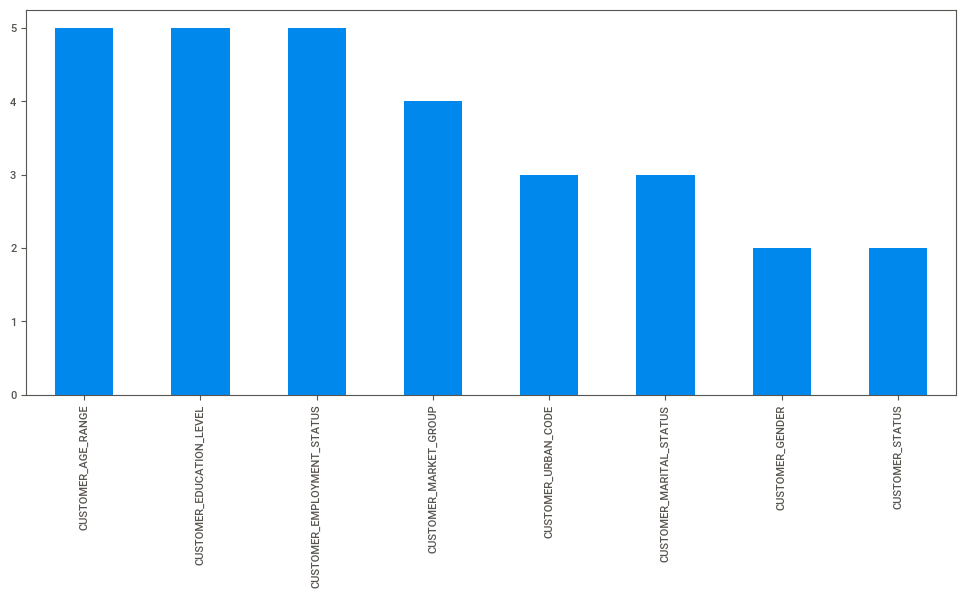

In [19]:
# visualize the number of unique categories for each categorical variable
customer_data[categorical_cols].nunique().sort_values(ascending=False).plot.bar(figsize=(12,5))

**Encoding Categorical variables**

In [20]:
# Define a list of nominal columns for one-hot encoding
nominal_cols = ['CUSTOMER_GENDER', 'CUSTOMER_URBAN_CODE', 'CUSTOMER_MARKET_GROUP', 'CUSTOMER_EMPLOYMENT_STATUS', 'CUSTOMER_STATUS']

# Perform one-hot encoding on nominal columns
data_encoded = pd.get_dummies(customer_data, columns=nominal_cols)

# Map education levels to an ordinal scale
education_order = {'HIGH SCHOOL': 1, 'COLLEGE': 2, 'UNIVERSITY': 3, 'PHD': 4, 'PROFESSIONAL': 5}
data_encoded['CUSTOMER_EDUCATION_LEVEL'] = customer_data['CUSTOMER_EDUCATION_LEVEL'].map(education_order)

# Further perform one-hot encoding on additional categorical columns
data_encoded = pd.get_dummies(data_encoded, columns=['CUSTOMER_AGE_RANGE', 'CUSTOMER_MARITAL_STATUS'])


age_range_order = {'23 TO 30': 1, '30 TO 40': 2, '40 TO 55': 3, '55 TO 65': 4, '65 AND OVER': 5}

customer_data = data_encoded
customer_data.head()

,CUSTOMER_EDUCATION_LEVEL,CUSTOMER_SUMMARY_TOTAL_AMOUNT_OF_DEPOSITS,CUSTOMER_NUMBER_OF_DEPENDENT_CHILDREN,CUSTOMER_ANNUAL_INCOME,CUSTOMER_SUMMARY_NUMBER_OF_ACCOUNTS,CUSTOMER_SUMMARY_AVERAGE_SENTIMENT_SCORE,CUSTOMER_INTERNET_BANKING_INDICATOR,CUSTOMER_FAMILY_SIZE,NUM_ACCOUNTS_WITH_RISK_TOLERANCE_HIGH,NUM_ACCOUNTS_WITH_RISK_TOLERANCE_LOW,NUM_ACCOUNTS_WITH_RISK_TOLERANCE_MODERATE,NUM_ACCOUNTS_WITH_RISK_TOLERANCE_VERY_LOW,NUM_ACCOUNTS_WITH_INVESTMENT_OBJECTIVE_GROWTH,NUM_ACCOUNTS_WITH_INVESTMENT_OBJECTIVE_INCOME,NUM_ACCOUNTS_WITH_INVESTMENT_OBJECTIVE_PLANNING,NUM_ACCOUNTS_WITH_INVESTMENT_OBJECTIVE_SECURE_GROWTH,NUM_ACCOUNTS_WITH_INVESTMENT_OBJECTIVE_SECURITY,CUSTOMER_SUMMARY_TOTAL_AMOUNT_OF_MARKET_CHANGE,CUSTOMER_SUMMARY_NUMBER_OF_TRANSACTIONS,CUSTOMER_SUMMARY_FUNDS_UNDER_MANAGEMENT,CUSTOMER_CUSTOMER_ID,CUSTOMER_SUMMARY_END_DATE,CUSTOMER_SUMMARY_START_DATE,CUSTOMER_EFFECTIVE_DATE,CUSTOMER_RELATIONSHIP_START_DATE,CUSTOMER_GENDER_FEMALE,CUSTOMER_GENDER_MALE,CUSTOMER_URBAN_CODE_CITY,CUSTOMER_URBAN_CODE_RURAL,CUSTOMER_URBAN_CODE_URBAN,CUSTOMER_MARKET_GROUP_ACCUMULATING,CUSTOMER_MARKET_GROUP_GIFTING,CUSTOMER_MARKET_GROUP_SPENDING,CUSTOMER_MARKET_GROUP_STARTING,CUSTOMER_EMPLOYMENT_STATUS_EMPLOYED,CUSTOMER_EMPLOYMENT_STATUS_HOMEMAKER,CUSTOMER_EMPLOYMENT_STATUS_RETIRED,CUSTOMER_EMPLOYMENT_STATUS_SELFEMPLOYED,CUSTOMER_EMPLOYMENT_STATUS_UNEMPLOYED,CUSTOMER_STATUS_ACTIVE,CUSTOMER_STATUS_INACTIVE,CUSTOMER_AGE_RANGE_23 TO 30,CUSTOMER_AGE_RANGE_30 TO 40,CUSTOMER_AGE_RANGE_40 TO 55,CUSTOMER_AGE_RANGE_55 TO 65,CUSTOMER_AGE_RANGE_65 AND OVER,CUSTOMER_MARITAL_STATUS_DIVORCED,CUSTOMER_MARITAL_STATUS_MARRIED,CUSTOMER_MARITAL_STATUS_SINGLE
0,2,2034.610329,2,550000.0,4,3,1,4,NaN,NaN,3.0,1.0,NaN,NaN,1.0,2.0,1.0,4019.183857,2,180000.0,1024,2018-09-30,2018-09-01,2016-07-23,2016-07-23,0,1,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0
1,2,1656.750260,2,550000.0,4,0,1,4,NaN,NaN,3.0,1.0,NaN,NaN,1.0,2.0,1.0,3498.384916,2,180000.0,1024,2016-12-31,2016-12-01,2016-07-23,2016-07-23,0,1,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0
2,2,954.949321,2,550000.0,4,4,1,4,NaN,NaN,3.0,1.0,NaN,NaN,1.0,2.0,1.0,2000.247375,2,180000.0,1024,2017-09-30,2017-09-01,2016-07-23,2016-07-23,0,1,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0
3,2,3386.882010,2,550000.0,4,0,1,4,NaN,NaN,3.0,1.0,NaN,NaN,1.0,2.0,1.0,2185.212288,2,180000.0,1024,2016-10-31,2016-10-01,2016-07-23,2016-07-23,0,1,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0
4,2,836.334713,2,550000.0,4,0,1,4,NaN,NaN,3.0,1.0,NaN,NaN,1.0,2.0,1.0,-2.537837,1,180000.0,1024,2017-07-31,2017-07-01,2016-07-23,2016-07-23,0,1,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0


### Working on numerical variables

In [21]:
customer_data[numerical_cols]

,CUSTOMER_SUMMARY_TOTAL_AMOUNT_OF_DEPOSITS,CUSTOMER_NUMBER_OF_DEPENDENT_CHILDREN,CUSTOMER_ANNUAL_INCOME,CUSTOMER_SUMMARY_NUMBER_OF_ACCOUNTS,CUSTOMER_SUMMARY_AVERAGE_SENTIMENT_SCORE,CUSTOMER_INTERNET_BANKING_INDICATOR,CUSTOMER_FAMILY_SIZE,NUM_ACCOUNTS_WITH_RISK_TOLERANCE_HIGH,NUM_ACCOUNTS_WITH_RISK_TOLERANCE_LOW,NUM_ACCOUNTS_WITH_RISK_TOLERANCE_MODERATE,NUM_ACCOUNTS_WITH_RISK_TOLERANCE_VERY_LOW,NUM_ACCOUNTS_WITH_INVESTMENT_OBJECTIVE_GROWTH,NUM_ACCOUNTS_WITH_INVESTMENT_OBJECTIVE_INCOME,NUM_ACCOUNTS_WITH_INVESTMENT_OBJECTIVE_PLANNING,NUM_ACCOUNTS_WITH_INVESTMENT_OBJECTIVE_SECURE_GROWTH,NUM_ACCOUNTS_WITH_INVESTMENT_OBJECTIVE_SECURITY,CUSTOMER_SUMMARY_TOTAL_AMOUNT_OF_MARKET_CHANGE,CUSTOMER_SUMMARY_NUMBER_OF_TRANSACTIONS,CUSTOMER_SUMMARY_FUNDS_UNDER_MANAGEMENT,CUSTOMER_CUSTOMER_ID
0,2034.610329,2,550000.0,4,3,1,4,NaN,NaN,3.0,1.0,NaN,NaN,1.0,2.0,1.0,4019.183857,2,180000.0,1024
1,1656.750260,2,550000.0,4,0,1,4,NaN,NaN,3.0,1.0,NaN,NaN,1.0,2.0,1.0,3498.384916,2,180000.0,1024
2,954.949321,2,550000.0,4,4,1,4,NaN,NaN,3.0,1.0,NaN,NaN,1.0,2.0,1.0,2000.247375,2,180000.0,1024
3,3386.882010,2,550000.0,4,0,1,4,NaN,NaN,3.0,1.0,NaN,NaN,1.0,2.0,1.0,2185.212288,2,180000.0,1024
4,836.334713,2,550000.0,4,0,1,4,NaN,NaN,3.0,1.0,NaN,NaN,1.0,2.0,1.0,-2.537837,1,180000.0,1024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19246,1101.651965,0,235000.0,3,4,0,1,NaN,2.0,1.0,NaN,NaN,2.0,1.0,NaN,NaN,8483.864581,2,1250000.0,1532
19247,750.339350,0,235000.0,3,2,0,1,NaN,2.0,1.0,NaN,NaN,2.0,1.0,NaN,NaN,9337.569552,1,1250000.0,1532
19248,1549.408697,0,100000.0,3,5,1,1,NaN,2.0,1.0,NaN,NaN,2.0,1.0,NaN,NaN,972.667717,1,180000.0,1071
19249,973.619115,2,250000.0,3,1,1,4,1.0,NaN,2.0,NaN,1.0,NaN,2.0,NaN,NaN,2942.904565,1,1250000.0,1385


In [22]:
# Checking for unique values in numerical columns
for column in numerical_cols:
    unique_values = customer_data[column].dropna().value_counts()
    print(f"Unique values in '{column}':\n{unique_values}\n")

Unique values in 'CUSTOMER_SUMMARY_TOTAL_AMOUNT_OF_DEPOSITS':
0.000000       126
2034.610329      1
746.816414       1
282.916175       1
493.310904       1
              ... 
1111.064587      1
865.008395       1
1632.756003      1
1087.100810      1
494.381906       1
Name: CUSTOMER_SUMMARY_TOTAL_AMOUNT_OF_DEPOSITS, Length: 19126, dtype: int64

Unique values in 'CUSTOMER_NUMBER_OF_DEPENDENT_CHILDREN':
0    6800
2    6458
1    5993
Name: CUSTOMER_NUMBER_OF_DEPENDENT_CHILDREN, dtype: int64

Unique values in 'CUSTOMER_ANNUAL_INCOME':
120000.0    749
140000.0    662
50000.0     634
95000.0     571
130000.0    549
           ... 
555000.0     15
510000.0     11
430000.0     10
425000.0      5
595000.0      2
Name: CUSTOMER_ANNUAL_INCOME, Length: 110, dtype: int64

Unique values in 'CUSTOMER_SUMMARY_NUMBER_OF_ACCOUNTS':
3    10053
2     5008
1     2223
4     1967
Name: CUSTOMER_SUMMARY_NUMBER_OF_ACCOUNTS, dtype: int64

Unique values in 'CUSTOMER_SUMMARY_AVERAGE_SENTIMENT_SCORE':
0    4501


In [23]:
# Check for missing columns and their values in the numerical columns
print("\nMissing values in numerical columns:")
for col in numerical_cols:
    missing_values = customer_data[col].isnull().sum()
    if missing_values > 0:
        print(f"{col}: {missing_values} missing value(s)")


Missing values in numerical columns:
NUM_ACCOUNTS_WITH_RISK_TOLERANCE_HIGH: 13274 missing value(s)
NUM_ACCOUNTS_WITH_RISK_TOLERANCE_LOW: 14868 missing value(s)
NUM_ACCOUNTS_WITH_RISK_TOLERANCE_MODERATE: 7566 missing value(s)
NUM_ACCOUNTS_WITH_RISK_TOLERANCE_VERY_LOW: 11881 missing value(s)
NUM_ACCOUNTS_WITH_INVESTMENT_OBJECTIVE_GROWTH: 13274 missing value(s)
NUM_ACCOUNTS_WITH_INVESTMENT_OBJECTIVE_INCOME: 14868 missing value(s)
NUM_ACCOUNTS_WITH_INVESTMENT_OBJECTIVE_PLANNING: 9216 missing value(s)
NUM_ACCOUNTS_WITH_INVESTMENT_OBJECTIVE_SECURE_GROWTH: 14096 missing value(s)
NUM_ACCOUNTS_WITH_INVESTMENT_OBJECTIVE_SECURITY: 11881 missing value(s)


**It can be seen that there are many columns with missing values in the numerical columns**

Based on the unique values of the columns with missing numbers, it can be assumed that these columns represent some form of count or frequency, as the missing values are represented as NaN (Not a Number) and the non-missing values are integers (1, 2, 3).
- We will impute these missing values by replacing hem with zero(0). 
- This assumes that the missing values indicate the absence of accounts with a particular risk tolerance or investment objective.

In [24]:
# Fixing the missing values in the numerical columns by replacing them with zero '0'

# defining a variable for all columns with missing values
columns_to_impute = [
    'NUM_ACCOUNTS_WITH_RISK_TOLERANCE_HIGH',
    'NUM_ACCOUNTS_WITH_RISK_TOLERANCE_LOW',
    'NUM_ACCOUNTS_WITH_RISK_TOLERANCE_MODERATE',
    'NUM_ACCOUNTS_WITH_RISK_TOLERANCE_VERY_LOW',
    'NUM_ACCOUNTS_WITH_INVESTMENT_OBJECTIVE_GROWTH',
    'NUM_ACCOUNTS_WITH_INVESTMENT_OBJECTIVE_INCOME',
    'NUM_ACCOUNTS_WITH_INVESTMENT_OBJECTIVE_PLANNING',
    'NUM_ACCOUNTS_WITH_INVESTMENT_OBJECTIVE_SECURE_GROWTH',
    'NUM_ACCOUNTS_WITH_INVESTMENT_OBJECTIVE_SECURITY']

# filling all missing values with 0
customer_data[columns_to_impute] = customer_data[columns_to_impute].fillna(0)

# checking for missing numbers
customer_data = customer_data
customer_data.isnull().sum()

CUSTOMER_EDUCATION_LEVEL                                0
CUSTOMER_SUMMARY_TOTAL_AMOUNT_OF_DEPOSITS               0
CUSTOMER_NUMBER_OF_DEPENDENT_CHILDREN                   0
CUSTOMER_ANNUAL_INCOME                                  0
CUSTOMER_SUMMARY_NUMBER_OF_ACCOUNTS                     0
CUSTOMER_SUMMARY_AVERAGE_SENTIMENT_SCORE                0
CUSTOMER_INTERNET_BANKING_INDICATOR                     0
CUSTOMER_FAMILY_SIZE                                    0
NUM_ACCOUNTS_WITH_RISK_TOLERANCE_HIGH                   0
NUM_ACCOUNTS_WITH_RISK_TOLERANCE_LOW                    0
NUM_ACCOUNTS_WITH_RISK_TOLERANCE_MODERATE               0
NUM_ACCOUNTS_WITH_RISK_TOLERANCE_VERY_LOW               0
NUM_ACCOUNTS_WITH_INVESTMENT_OBJECTIVE_GROWTH           0
NUM_ACCOUNTS_WITH_INVESTMENT_OBJECTIVE_INCOME           0
NUM_ACCOUNTS_WITH_INVESTMENT_OBJECTIVE_PLANNING         0
NUM_ACCOUNTS_WITH_INVESTMENT_OBJECTIVE_SECURE_GROWTH    0
NUM_ACCOUNTS_WITH_INVESTMENT_OBJECTIVE_SECURITY         0
CUSTOMER_SUMMA

## Performing more feature engineering  as well as deriving the target variable

In [25]:
customer_data.columns

Index(['CUSTOMER_EDUCATION_LEVEL', 'CUSTOMER_SUMMARY_TOTAL_AMOUNT_OF_DEPOSITS',
       'CUSTOMER_NUMBER_OF_DEPENDENT_CHILDREN', 'CUSTOMER_ANNUAL_INCOME',
       'CUSTOMER_SUMMARY_NUMBER_OF_ACCOUNTS',
       'CUSTOMER_SUMMARY_AVERAGE_SENTIMENT_SCORE',
       'CUSTOMER_INTERNET_BANKING_INDICATOR', 'CUSTOMER_FAMILY_SIZE',
       'NUM_ACCOUNTS_WITH_RISK_TOLERANCE_HIGH',
       'NUM_ACCOUNTS_WITH_RISK_TOLERANCE_LOW',
       'NUM_ACCOUNTS_WITH_RISK_TOLERANCE_MODERATE',
       'NUM_ACCOUNTS_WITH_RISK_TOLERANCE_VERY_LOW',
       'NUM_ACCOUNTS_WITH_INVESTMENT_OBJECTIVE_GROWTH',
       'NUM_ACCOUNTS_WITH_INVESTMENT_OBJECTIVE_INCOME',
       'NUM_ACCOUNTS_WITH_INVESTMENT_OBJECTIVE_PLANNING',
       'NUM_ACCOUNTS_WITH_INVESTMENT_OBJECTIVE_SECURE_GROWTH',
       'NUM_ACCOUNTS_WITH_INVESTMENT_OBJECTIVE_SECURITY',
       'CUSTOMER_SUMMARY_TOTAL_AMOUNT_OF_MARKET_CHANGE',
       'CUSTOMER_SUMMARY_NUMBER_OF_TRANSACTIONS',
       'CUSTOMER_SUMMARY_FUNDS_UNDER_MANAGEMENT', 'CUSTOMER_CUSTOMER_ID',
       '

In [26]:
# Duration Features
customer_data['CUSTOMER_RELATIONSHIP_DURATION'] = (customer_data['CUSTOMER_SUMMARY_END_DATE'] - customer_data['CUSTOMER_RELATIONSHIP_START_DATE']).dt.days
customer_data['CUSTOMER_MEMBERSHIP_DURATION'] = (customer_data['CUSTOMER_SUMMARY_END_DATE'] - customer_data['CUSTOMER_SUMMARY_START_DATE']).dt.days

# Time-related Features
customer_data['YEAR'] = customer_data['CUSTOMER_SUMMARY_END_DATE'].dt.year
customer_data['MONTH'] = customer_data['CUSTOMER_SUMMARY_END_DATE'].dt.month
customer_data['DAY'] = customer_data['CUSTOMER_SUMMARY_END_DATE'].dt.day

# Periodicity Features
customer_data['MONTH_SIN'] = np.sin(2 * np.pi * customer_data['MONTH'] / 12)
customer_data['MONTH_COS'] = np.cos(2 * np.pi * customer_data['MONTH'] / 12)

# Drop the original date columns
# customer_data = customer_data.drop(date_columns, axis=1)

# Print the updated DataFrame
customer_data.head()

,CUSTOMER_EDUCATION_LEVEL,CUSTOMER_SUMMARY_TOTAL_AMOUNT_OF_DEPOSITS,CUSTOMER_NUMBER_OF_DEPENDENT_CHILDREN,CUSTOMER_ANNUAL_INCOME,CUSTOMER_SUMMARY_NUMBER_OF_ACCOUNTS,CUSTOMER_SUMMARY_AVERAGE_SENTIMENT_SCORE,CUSTOMER_INTERNET_BANKING_INDICATOR,CUSTOMER_FAMILY_SIZE,NUM_ACCOUNTS_WITH_RISK_TOLERANCE_HIGH,NUM_ACCOUNTS_WITH_RISK_TOLERANCE_LOW,NUM_ACCOUNTS_WITH_RISK_TOLERANCE_MODERATE,NUM_ACCOUNTS_WITH_RISK_TOLERANCE_VERY_LOW,NUM_ACCOUNTS_WITH_INVESTMENT_OBJECTIVE_GROWTH,NUM_ACCOUNTS_WITH_INVESTMENT_OBJECTIVE_INCOME,NUM_ACCOUNTS_WITH_INVESTMENT_OBJECTIVE_PLANNING,NUM_ACCOUNTS_WITH_INVESTMENT_OBJECTIVE_SECURE_GROWTH,NUM_ACCOUNTS_WITH_INVESTMENT_OBJECTIVE_SECURITY,CUSTOMER_SUMMARY_TOTAL_AMOUNT_OF_MARKET_CHANGE,CUSTOMER_SUMMARY_NUMBER_OF_TRANSACTIONS,CUSTOMER_SUMMARY_FUNDS_UNDER_MANAGEMENT,CUSTOMER_CUSTOMER_ID,CUSTOMER_SUMMARY_END_DATE,CUSTOMER_SUMMARY_START_DATE,CUSTOMER_EFFECTIVE_DATE,CUSTOMER_RELATIONSHIP_START_DATE,CUSTOMER_GENDER_FEMALE,CUSTOMER_GENDER_MALE,CUSTOMER_URBAN_CODE_CITY,CUSTOMER_URBAN_CODE_RURAL,CUSTOMER_URBAN_CODE_URBAN,CUSTOMER_MARKET_GROUP_ACCUMULATING,CUSTOMER_MARKET_GROUP_GIFTING,CUSTOMER_MARKET_GROUP_SPENDING,CUSTOMER_MARKET_GROUP_STARTING,CUSTOMER_EMPLOYMENT_STATUS_EMPLOYED,CUSTOMER_EMPLOYMENT_STATUS_HOMEMAKER,CUSTOMER_EMPLOYMENT_STATUS_RETIRED,CUSTOMER_EMPLOYMENT_STATUS_SELFEMPLOYED,CUSTOMER_EMPLOYMENT_STATUS_UNEMPLOYED,CUSTOMER_STATUS_ACTIVE,CUSTOMER_STATUS_INACTIVE,CUSTOMER_AGE_RANGE_23 TO 30,CUSTOMER_AGE_RANGE_30 TO 40,CUSTOMER_AGE_RANGE_40 TO 55,CUSTOMER_AGE_RANGE_55 TO 65,CUSTOMER_AGE_RANGE_65 AND OVER,CUSTOMER_MARITAL_STATUS_DIVORCED,CUSTOMER_MARITAL_STATUS_MARRIED,CUSTOMER_MARITAL_STATUS_SINGLE,CUSTOMER_RELATIONSHIP_DURATION,CUSTOMER_MEMBERSHIP_DURATION,YEAR,MONTH,DAY,MONTH_SIN,MONTH_COS
0,2,2034.610329,2,550000.0,4,3,1,4,0.0,0.0,3.0,1.0,0.0,0.0,1.0,2.0,1.0,4019.183857,2,180000.0,1024,2018-09-30,2018-09-01,2016-07-23,2016-07-23,0,1,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,799,29,2018,9,30,-1.000000e+00,-1.836970e-16
1,2,1656.750260,2,550000.0,4,0,1,4,0.0,0.0,3.0,1.0,0.0,0.0,1.0,2.0,1.0,3498.384916,2,180000.0,1024,2016-12-31,2016-12-01,2016-07-23,2016-07-23,0,1,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,161,30,2016,12,31,-2.449294e-16,1.000000e+00
2,2,954.949321,2,550000.0,4,4,1,4,0.0,0.0,3.0,1.0,0.0,0.0,1.0,2.0,1.0,2000.247375,2,180000.0,1024,2017-09-30,2017-09-01,2016-07-23,2016-07-23,0,1,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,434,29,2017,9,30,-1.000000e+00,-1.836970e-16
3,2,3386.882010,2,550000.0,4,0,1,4,0.0,0.0,3.0,1.0,0.0,0.0,1.0,2.0,1.0,2185.212288,2,180000.0,1024,2016-10-31,2016-10-01,2016-07-23,2016-07-23,0,1,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,100,30,2016,10,31,-8.660254e-01,5.000000e-01
4,2,836.334713,2,550000.0,4,0,1,4,0.0,0.0,3.0,1.0,0.0,0.0,1.0,2.0,1.0,-2.537837,1,180000.0,1024,2017-07-31,2017-07-01,2016-07-23,2016-07-23,0,1,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,373,30,2017,7,31,-5.000000e-01,-8.660254e-01


In [27]:
customer_data.columns

Index(['CUSTOMER_EDUCATION_LEVEL', 'CUSTOMER_SUMMARY_TOTAL_AMOUNT_OF_DEPOSITS',
       'CUSTOMER_NUMBER_OF_DEPENDENT_CHILDREN', 'CUSTOMER_ANNUAL_INCOME',
       'CUSTOMER_SUMMARY_NUMBER_OF_ACCOUNTS',
       'CUSTOMER_SUMMARY_AVERAGE_SENTIMENT_SCORE',
       'CUSTOMER_INTERNET_BANKING_INDICATOR', 'CUSTOMER_FAMILY_SIZE',
       'NUM_ACCOUNTS_WITH_RISK_TOLERANCE_HIGH',
       'NUM_ACCOUNTS_WITH_RISK_TOLERANCE_LOW',
       'NUM_ACCOUNTS_WITH_RISK_TOLERANCE_MODERATE',
       'NUM_ACCOUNTS_WITH_RISK_TOLERANCE_VERY_LOW',
       'NUM_ACCOUNTS_WITH_INVESTMENT_OBJECTIVE_GROWTH',
       'NUM_ACCOUNTS_WITH_INVESTMENT_OBJECTIVE_INCOME',
       'NUM_ACCOUNTS_WITH_INVESTMENT_OBJECTIVE_PLANNING',
       'NUM_ACCOUNTS_WITH_INVESTMENT_OBJECTIVE_SECURE_GROWTH',
       'NUM_ACCOUNTS_WITH_INVESTMENT_OBJECTIVE_SECURITY',
       'CUSTOMER_SUMMARY_TOTAL_AMOUNT_OF_MARKET_CHANGE',
       'CUSTOMER_SUMMARY_NUMBER_OF_TRANSACTIONS',
       'CUSTOMER_SUMMARY_FUNDS_UNDER_MANAGEMENT', 'CUSTOMER_CUSTOMER_ID',
       '

In [28]:
# Check for missing values
missing_values = customer_data.isnull().sum()

# Display the count of missing values for each column
print(missing_values)

CUSTOMER_EDUCATION_LEVEL                                0
CUSTOMER_SUMMARY_TOTAL_AMOUNT_OF_DEPOSITS               0
CUSTOMER_NUMBER_OF_DEPENDENT_CHILDREN                   0
CUSTOMER_ANNUAL_INCOME                                  0
CUSTOMER_SUMMARY_NUMBER_OF_ACCOUNTS                     0
CUSTOMER_SUMMARY_AVERAGE_SENTIMENT_SCORE                0
CUSTOMER_INTERNET_BANKING_INDICATOR                     0
CUSTOMER_FAMILY_SIZE                                    0
NUM_ACCOUNTS_WITH_RISK_TOLERANCE_HIGH                   0
NUM_ACCOUNTS_WITH_RISK_TOLERANCE_LOW                    0
NUM_ACCOUNTS_WITH_RISK_TOLERANCE_MODERATE               0
NUM_ACCOUNTS_WITH_RISK_TOLERANCE_VERY_LOW               0
NUM_ACCOUNTS_WITH_INVESTMENT_OBJECTIVE_GROWTH           0
NUM_ACCOUNTS_WITH_INVESTMENT_OBJECTIVE_INCOME           0
NUM_ACCOUNTS_WITH_INVESTMENT_OBJECTIVE_PLANNING         0
NUM_ACCOUNTS_WITH_INVESTMENT_OBJECTIVE_SECURE_GROWTH    0
NUM_ACCOUNTS_WITH_INVESTMENT_OBJECTIVE_SECURITY         0
CUSTOMER_SUMMA

### Defining the target feature (attrition)

In [29]:
# Sort the customer_data DataFrame by customer ID and date
customer_data.sort_values(by=['CUSTOMER_CUSTOMER_ID', 'CUSTOMER_EFFECTIVE_DATE'], inplace=True)

# Create AUM_PREV_MONTH column with funds under management for the previous month
customer_data['AUM_PREV_MONTH'] = customer_data.groupby('CUSTOMER_CUSTOMER_ID')['CUSTOMER_SUMMARY_FUNDS_UNDER_MANAGEMENT'].shift() # default value is 1

# Calculate the ratio of funds for the current month to the previous month
customer_data['RATIO'] = customer_data['CUSTOMER_SUMMARY_FUNDS_UNDER_MANAGEMENT'] / customer_data['AUM_PREV_MONTH']
customer_data['RATIO'].fillna(9999, inplace=True)  # Fill missing values with an arbitrarily large number (9999)

# Create FUNDS_DROP column and set it to 1 if the ratio is below or equal to a threshold, otherwise set it to 0
threshold = 0.75  # Define the threshold for funds drop
customer_data['FUNDS_DROP'] = (customer_data['RATIO'] <= threshold).astype(int)

# Create ATTRITION column based on FUNDS_DROP and CUSTOMER_STATUS
customer_data['ATTRITION'] = ((customer_data['FUNDS_DROP'] == 1) | (customer_data['CUSTOMER_STATUS_INACTIVE'] == 1)).astype(int)

# Print the first 10 rows of updated DataFrame
customer_data.head(10)

,CUSTOMER_EDUCATION_LEVEL,CUSTOMER_SUMMARY_TOTAL_AMOUNT_OF_DEPOSITS,CUSTOMER_NUMBER_OF_DEPENDENT_CHILDREN,CUSTOMER_ANNUAL_INCOME,CUSTOMER_SUMMARY_NUMBER_OF_ACCOUNTS,CUSTOMER_SUMMARY_AVERAGE_SENTIMENT_SCORE,CUSTOMER_INTERNET_BANKING_INDICATOR,CUSTOMER_FAMILY_SIZE,NUM_ACCOUNTS_WITH_RISK_TOLERANCE_HIGH,NUM_ACCOUNTS_WITH_RISK_TOLERANCE_LOW,NUM_ACCOUNTS_WITH_RISK_TOLERANCE_MODERATE,NUM_ACCOUNTS_WITH_RISK_TOLERANCE_VERY_LOW,NUM_ACCOUNTS_WITH_INVESTMENT_OBJECTIVE_GROWTH,NUM_ACCOUNTS_WITH_INVESTMENT_OBJECTIVE_INCOME,NUM_ACCOUNTS_WITH_INVESTMENT_OBJECTIVE_PLANNING,NUM_ACCOUNTS_WITH_INVESTMENT_OBJECTIVE_SECURE_GROWTH,NUM_ACCOUNTS_WITH_INVESTMENT_OBJECTIVE_SECURITY,CUSTOMER_SUMMARY_TOTAL_AMOUNT_OF_MARKET_CHANGE,CUSTOMER_SUMMARY_NUMBER_OF_TRANSACTIONS,CUSTOMER_SUMMARY_FUNDS_UNDER_MANAGEMENT,CUSTOMER_CUSTOMER_ID,CUSTOMER_SUMMARY_END_DATE,CUSTOMER_SUMMARY_START_DATE,CUSTOMER_EFFECTIVE_DATE,CUSTOMER_RELATIONSHIP_START_DATE,CUSTOMER_GENDER_FEMALE,CUSTOMER_GENDER_MALE,CUSTOMER_URBAN_CODE_CITY,CUSTOMER_URBAN_CODE_RURAL,CUSTOMER_URBAN_CODE_URBAN,CUSTOMER_MARKET_GROUP_ACCUMULATING,CUSTOMER_MARKET_GROUP_GIFTING,CUSTOMER_MARKET_GROUP_SPENDING,CUSTOMER_MARKET_GROUP_STARTING,CUSTOMER_EMPLOYMENT_STATUS_EMPLOYED,CUSTOMER_EMPLOYMENT_STATUS_HOMEMAKER,CUSTOMER_EMPLOYMENT_STATUS_RETIRED,CUSTOMER_EMPLOYMENT_STATUS_SELFEMPLOYED,CUSTOMER_EMPLOYMENT_STATUS_UNEMPLOYED,CUSTOMER_STATUS_ACTIVE,CUSTOMER_STATUS_INACTIVE,CUSTOMER_AGE_RANGE_23 TO 30,CUSTOMER_AGE_RANGE_30 TO 40,CUSTOMER_AGE_RANGE_40 TO 55,CUSTOMER_AGE_RANGE_55 TO 65,CUSTOMER_AGE_RANGE_65 AND OVER,CUSTOMER_MARITAL_STATUS_DIVORCED,CUSTOMER_MARITAL_STATUS_MARRIED,CUSTOMER_MARITAL_STATUS_SINGLE,CUSTOMER_RELATIONSHIP_DURATION,CUSTOMER_MEMBERSHIP_DURATION,YEAR,MONTH,DAY,MONTH_SIN,MONTH_COS,AUM_PREV_MONTH,RATIO,FUNDS_DROP,ATTRITION
18627,2,734.073716,1,325000.0,2,0,1,3,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1698.431514,1,100000.0,1000,2018-08-31,2018-08-01,2018-01-02,2018-01-02,0,1,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,241,30,2018,8,31,-8.660254e-01,-5.000000e-01,NaN,9999.0,0,0
18628,2,956.047156,1,325000.0,2,2,1,3,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,-748.117129,1,100000.0,1000,2018-05-31,2018-05-01,2018-01-02,2018-01-02,0,1,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,149,30,2018,5,31,5.000000e-01,-8.660254e-01,100000.0,1.0,0,0
18629,2,857.055018,1,325000.0,2,5,1,3,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,2778.066452,2,100000.0,1000,2018-03-31,2018-03-01,2018-01-02,2018-01-02,0,1,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,88,30,2018,3,31,1.000000e+00,6.123234e-17,100000.0,1.0,0,0
18630,2,1077.471084,1,325000.0,2,3,1,3,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1506.201855,2,100000.0,1000,2018-06-30,2018-06-01,2018-01-02,2018-01-02,0,1,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,179,29,2018,6,30,1.224647e-16,-1.000000e+00,100000.0,1.0,0,0
18631,2,1195.445725,1,325000.0,2,2,1,3,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,133.163061,1,100000.0,1000,2018-04-30,2018-04-01,2018-01-02,2018-01-02,0,1,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,118,29,2018,4,30,8.660254e-01,-5.000000e-01,100000.0,1.0,0,0
18632,2,768.523528,1,325000.0,2,3,1,3,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,630.890977,1,100000.0,1000,2018-01-31,2018-01-01,2018-01-02,2018-01-02,0,1,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,29,30,2018,1,31,5.000000e-01,8.660254e-01,100000.0,1.0,0,0
18633,2,275.601581,1,325000.0,2,5,1,3,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,4127.174098,2,100000.0,1000,2018-02-28,2018-02-01,2018-01-02,2018-01-02,0,1,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,57,27,2018,2,28,8.660254e-01,5.000000e-01,100000.0,1.0,0,0
18634,2,234.657544,1,325000.0,2,3,1,3,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1694.773605,2,100000.0,1000,2018-07-31,2018-07-01,2018-01-02,2018-01-02,0,1,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,210,30,2018,7,31,-5.000000e-01,-8.660254e-01,100000.0,1.0,0,0
18635,2,712.115854,1,325000.0,2,2,1,3,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,882.111205,1,100000.0,1000,2018-09-30,2018-09-01,2018-01-02,2018-01-02,0,1,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0

In [30]:
# Checking for datatypes
customer_data.dtypes

CUSTOMER_EDUCATION_LEVEL                                         int64
CUSTOMER_SUMMARY_TOTAL_AMOUNT_OF_DEPOSITS                      float64
CUSTOMER_NUMBER_OF_DEPENDENT_CHILDREN                            int64
CUSTOMER_ANNUAL_INCOME                                         float64
CUSTOMER_SUMMARY_NUMBER_OF_ACCOUNTS                              int64
CUSTOMER_SUMMARY_AVERAGE_SENTIMENT_SCORE                         int64
CUSTOMER_INTERNET_BANKING_INDICATOR                              int64
CUSTOMER_FAMILY_SIZE                                             int64
NUM_ACCOUNTS_WITH_RISK_TOLERANCE_HIGH                          float64
NUM_ACCOUNTS_WITH_RISK_TOLERANCE_LOW                           float64
NUM_ACCOUNTS_WITH_RISK_TOLERANCE_MODERATE                      float64
NUM_ACCOUNTS_WITH_RISK_TOLERANCE_VERY_LOW                      float64
NUM_ACCOUNTS_WITH_INVESTMENT_OBJECTIVE_GROWTH                  float64
NUM_ACCOUNTS_WITH_INVESTMENT_OBJECTIVE_INCOME                  float64
NUM_AC

In [31]:
# Check for missing values
missing_values = customer_data.isnull().sum()

# Display the count of missing values for each column
print(missing_values)

CUSTOMER_EDUCATION_LEVEL                                   0
CUSTOMER_SUMMARY_TOTAL_AMOUNT_OF_DEPOSITS                  0
CUSTOMER_NUMBER_OF_DEPENDENT_CHILDREN                      0
CUSTOMER_ANNUAL_INCOME                                     0
CUSTOMER_SUMMARY_NUMBER_OF_ACCOUNTS                        0
CUSTOMER_SUMMARY_AVERAGE_SENTIMENT_SCORE                   0
CUSTOMER_INTERNET_BANKING_INDICATOR                        0
CUSTOMER_FAMILY_SIZE                                       0
NUM_ACCOUNTS_WITH_RISK_TOLERANCE_HIGH                      0
NUM_ACCOUNTS_WITH_RISK_TOLERANCE_LOW                       0
NUM_ACCOUNTS_WITH_RISK_TOLERANCE_MODERATE                  0
NUM_ACCOUNTS_WITH_RISK_TOLERANCE_VERY_LOW                  0
NUM_ACCOUNTS_WITH_INVESTMENT_OBJECTIVE_GROWTH              0
NUM_ACCOUNTS_WITH_INVESTMENT_OBJECTIVE_INCOME              0
NUM_ACCOUNTS_WITH_INVESTMENT_OBJECTIVE_PLANNING            0
NUM_ACCOUNTS_WITH_INVESTMENT_OBJECTIVE_SECURE_GROWTH       0
NUM_ACCOUNTS_WITH_INVEST

We will use forward fill (ffill) in combination with fillna() method to fill the missing values of AUM_PREV_MONTH since the missing values will be filled using the previous non-null value in the column as it was derived by shifting values and the fillna() method with a value of 9999 will fill the first missing value as ffill does not fill the first missing value because there is no preceding non-null value to propagate forward from
- By using forward fill (ffill), the missing values in the "AUM_PREV_MONTH" column will be replaced with the most recent non-null value, effectively propagating the previous month's funds under management value forward.

In [32]:
# filling missing values in the AUM_PREV_MONTH using forward fill (ffill)
customer_data['AUM_PREV_MONTH'].ffill(inplace=True)
customer_data['AUM_PREV_MONTH'].fillna(9999, inplace=True)
customer_data.head()

,CUSTOMER_EDUCATION_LEVEL,CUSTOMER_SUMMARY_TOTAL_AMOUNT_OF_DEPOSITS,CUSTOMER_NUMBER_OF_DEPENDENT_CHILDREN,CUSTOMER_ANNUAL_INCOME,CUSTOMER_SUMMARY_NUMBER_OF_ACCOUNTS,CUSTOMER_SUMMARY_AVERAGE_SENTIMENT_SCORE,CUSTOMER_INTERNET_BANKING_INDICATOR,CUSTOMER_FAMILY_SIZE,NUM_ACCOUNTS_WITH_RISK_TOLERANCE_HIGH,NUM_ACCOUNTS_WITH_RISK_TOLERANCE_LOW,NUM_ACCOUNTS_WITH_RISK_TOLERANCE_MODERATE,NUM_ACCOUNTS_WITH_RISK_TOLERANCE_VERY_LOW,NUM_ACCOUNTS_WITH_INVESTMENT_OBJECTIVE_GROWTH,NUM_ACCOUNTS_WITH_INVESTMENT_OBJECTIVE_INCOME,NUM_ACCOUNTS_WITH_INVESTMENT_OBJECTIVE_PLANNING,NUM_ACCOUNTS_WITH_INVESTMENT_OBJECTIVE_SECURE_GROWTH,NUM_ACCOUNTS_WITH_INVESTMENT_OBJECTIVE_SECURITY,CUSTOMER_SUMMARY_TOTAL_AMOUNT_OF_MARKET_CHANGE,CUSTOMER_SUMMARY_NUMBER_OF_TRANSACTIONS,CUSTOMER_SUMMARY_FUNDS_UNDER_MANAGEMENT,CUSTOMER_CUSTOMER_ID,CUSTOMER_SUMMARY_END_DATE,CUSTOMER_SUMMARY_START_DATE,CUSTOMER_EFFECTIVE_DATE,CUSTOMER_RELATIONSHIP_START_DATE,CUSTOMER_GENDER_FEMALE,CUSTOMER_GENDER_MALE,CUSTOMER_URBAN_CODE_CITY,CUSTOMER_URBAN_CODE_RURAL,CUSTOMER_URBAN_CODE_URBAN,CUSTOMER_MARKET_GROUP_ACCUMULATING,CUSTOMER_MARKET_GROUP_GIFTING,CUSTOMER_MARKET_GROUP_SPENDING,CUSTOMER_MARKET_GROUP_STARTING,CUSTOMER_EMPLOYMENT_STATUS_EMPLOYED,CUSTOMER_EMPLOYMENT_STATUS_HOMEMAKER,CUSTOMER_EMPLOYMENT_STATUS_RETIRED,CUSTOMER_EMPLOYMENT_STATUS_SELFEMPLOYED,CUSTOMER_EMPLOYMENT_STATUS_UNEMPLOYED,CUSTOMER_STATUS_ACTIVE,CUSTOMER_STATUS_INACTIVE,CUSTOMER_AGE_RANGE_23 TO 30,CUSTOMER_AGE_RANGE_30 TO 40,CUSTOMER_AGE_RANGE_40 TO 55,CUSTOMER_AGE_RANGE_55 TO 65,CUSTOMER_AGE_RANGE_65 AND OVER,CUSTOMER_MARITAL_STATUS_DIVORCED,CUSTOMER_MARITAL_STATUS_MARRIED,CUSTOMER_MARITAL_STATUS_SINGLE,CUSTOMER_RELATIONSHIP_DURATION,CUSTOMER_MEMBERSHIP_DURATION,YEAR,MONTH,DAY,MONTH_SIN,MONTH_COS,AUM_PREV_MONTH,RATIO,FUNDS_DROP,ATTRITION
18627,2,734.073716,1,325000.0,2,0,1,3,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1698.431514,1,100000.0,1000,2018-08-31,2018-08-01,2018-01-02,2018-01-02,0,1,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,241,30,2018,8,31,-8.660254e-01,-5.000000e-01,9999.0,9999.0,0,0
18628,2,956.047156,1,325000.0,2,2,1,3,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,-748.117129,1,100000.0,1000,2018-05-31,2018-05-01,2018-01-02,2018-01-02,0,1,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,149,30,2018,5,31,5.000000e-01,-8.660254e-01,100000.0,1.0,0,0
18629,2,857.055018,1,325000.0,2,5,1,3,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,2778.066452,2,100000.0,1000,2018-03-31,2018-03-01,2018-01-02,2018-01-02,0,1,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,88,30,2018,3,31,1.000000e+00,6.123234e-17,100000.0,1.0,0,0
18630,2,1077.471084,1,325000.0,2,3,1,3,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1506.201855,2,100000.0,1000,2018-06-30,2018-06-01,2018-01-02,2018-01-02,0,1,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,179,29,2018,6,30,1.224647e-16,-1.000000e+00,100000.0,1.0,0,0
18631,2,1195.445725,1,325000.0,2,2,1,3,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,133.163061,1,100000.0,1000,2018-04-30,2018-04-01,2018-01-02,2018-01-02,0,1,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,118,29,2018,4,30,8.660254e-01,-5.000000e-01,100000.0,1.0,0,0


**Checking description of all numerical features to know which ones to scale or transform as most of the features have values are between 1-5**

In [33]:
customer_data.describe().T

,count,mean,std,min,25%,50%,75%,max
CUSTOMER_EDUCATION_LEVEL,19251.0,2.931588,1.407160,1.000000,2.000000,3.000000e+00,4.000000,5.000000e+00
CUSTOMER_SUMMARY_TOTAL_AMOUNT_OF_DEPOSITS,19251.0,1067.660024,658.477301,0.000000,588.057311,9.583793e+02,1446.427778,4.510451e+03
CUSTOMER_NUMBER_OF_DEPENDENT_CHILDREN,19251.0,0.982235,0.829706,0.000000,0.000000,1.000000e+00,2.000000,2.000000e+00
CUSTOMER_ANNUAL_INCOME,19251.0,220653.472547,132121.958480,50000.000000,115000.000000,1.850000e+05,315000.000000,7.400000e+05
CUSTOMER_SUMMARY_NUMBER_OF_ACCOUNTS,19251.0,2.611085,0.820364,1.000000,2.000000,3.000000e+00,3.000000,4.000000e+00
CUSTOMER_SUMMARY_AVERAGE_SENTIMENT_SCORE,19251.0,2.185133,1.713327,0.000000,1.000000,2.000000e+00,4.000000,5.000000e+00
CUSTOMER_INTERNET_BANKING_INDICATOR,19251.0,0.517687,0.499700,0.000000,0.000000,1.000000e+00,1.000000,1.000000e+00
CUSTOMER_FAMILY_SIZE,19251.0,2.648226,1.152519,1.000000,2.000000,3.000000e+00,4.000000,4.000000e+00
NUM_ACCOUNTS_WITH_RISK_TOLERANCE_HIGH,19251.0,0.333281,0.517520,0.000000,0.000000,0.000000e+00,1.000000,2.000000e+00
NUM_ACCOUNTS_WITH_RISK_TOLERANCE_LOW,19251.0,0.298426,0.592356,0.000000,0.000000,0.000000e+00,0.000000,2.000000e+00


**Base on the descriptive analysis, these selected columns need to be analyzed to check for outliers**

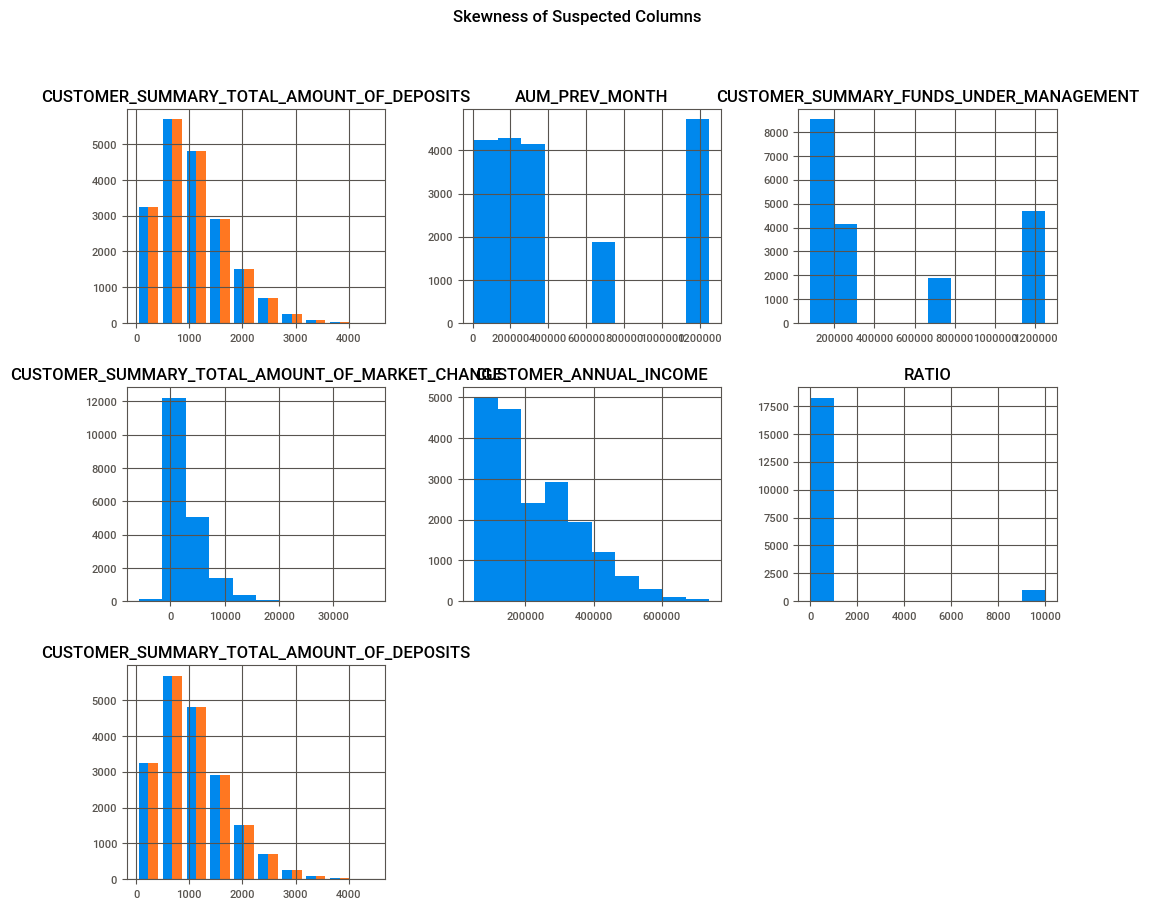

In [34]:
# Using histogram to check skewness
suspected_cols= ['CUSTOMER_SUMMARY_TOTAL_AMOUNT_OF_DEPOSITS', 
                 'AUM_PREV_MONTH', 
                 'CUSTOMER_SUMMARY_FUNDS_UNDER_MANAGEMENT', 
                 'CUSTOMER_SUMMARY_TOTAL_AMOUNT_OF_MARKET_CHANGE', 
                 'CUSTOMER_ANNUAL_INCOME', 
                 'RATIO','CUSTOMER_SUMMARY_TOTAL_AMOUNT_OF_DEPOSITS'] 

customer_data[suspected_cols].hist(figsize=(12,10), bins=10)
plt.suptitle('Skewness of Suspected Columns')
plt.show()


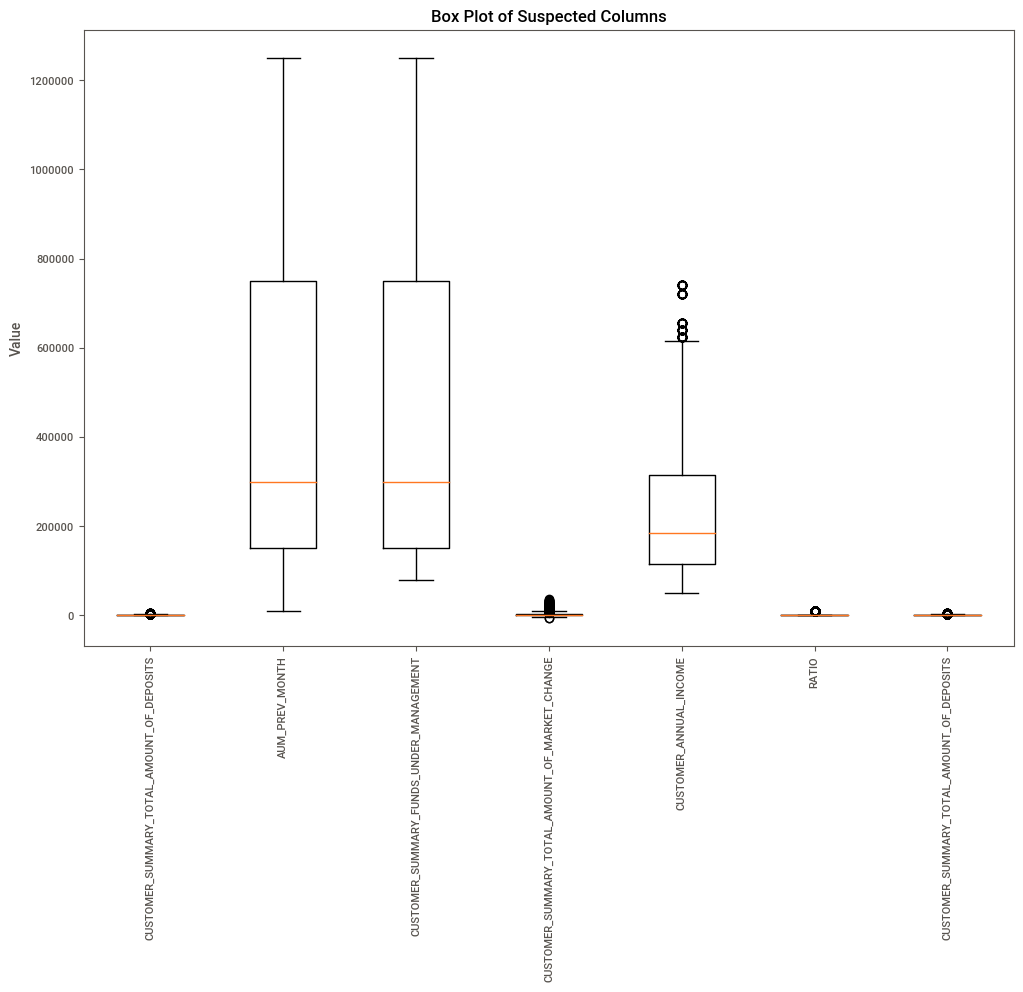

In [35]:
# Uing box plot
# Specify the columns to plot
suspected_cols = ['CUSTOMER_SUMMARY_TOTAL_AMOUNT_OF_DEPOSITS', 
                  'AUM_PREV_MONTH', 
                  'CUSTOMER_SUMMARY_FUNDS_UNDER_MANAGEMENT', 
                  'CUSTOMER_SUMMARY_TOTAL_AMOUNT_OF_MARKET_CHANGE', 
                  'CUSTOMER_ANNUAL_INCOME', 
                  'RATIO',
                  'CUSTOMER_SUMMARY_TOTAL_AMOUNT_OF_DEPOSITS']

# Create a figure and axes
fig, ax = plt.subplots(figsize=(12, 8))

# Plot the box plots
ax.boxplot(customer_data[suspected_cols])

# Set x-axis labels
ax.set_xticklabels(suspected_cols, rotation=90)

# Set y-axis label
ax.set_ylabel('Value')

# Set title
ax.set_title('Box Plot of Suspected Columns')

# Display the plot
plt.show()

In [36]:
# Printing the skewness of the suspected columns
print('Skewness of Suspected Columns')
customer_data[suspected_cols].skew()

Skewness of Suspected Columns


CUSTOMER_SUMMARY_TOTAL_AMOUNT_OF_DEPOSITS         0.906898
AUM_PREV_MONTH                                    0.800982
CUSTOMER_SUMMARY_FUNDS_UNDER_MANAGEMENT           0.801512
CUSTOMER_SUMMARY_TOTAL_AMOUNT_OF_MARKET_CHANGE    2.141050
CUSTOMER_ANNUAL_INCOME                            0.841518
RATIO                                             4.038358
CUSTOMER_SUMMARY_TOTAL_AMOUNT_OF_DEPOSITS         0.906898
dtype: float64

### We will apply some transformation to reduce the skewness

**We will use Box-Cox transformation for CUSTOMER_SUMMARY_TOTAL_AMOUNT_OF_MARKET_CHANGE because it is a useful tool for normalizing skewed data and preparing it for statistical analyses. It offers flexibility and automatic parameter estimation, but it requires careful handling of zero and negative values.**
-  Before applying the transformation, we add the absolute value of the minimum value in the column plus 1 to handle the negative values. 
- The boxcox() function returns the transformed data and the lambda value, which represents the power parameter used in the transformation.


**We will ignore the outliers in the RATIO column since we are the ones that filled the missing values to help  derive the target variable ATTRITION.**

In [37]:
from scipy.stats import boxcox

# Apply Box-Cox transformation to the CUSTOMER_SUMMARY_TOTAL_AMOUNT_OF_MARKET_CHANGE column
transformed_data, lambda_value = boxcox(customer_data['CUSTOMER_SUMMARY_TOTAL_AMOUNT_OF_MARKET_CHANGE'] + abs(customer_data['CUSTOMER_SUMMARY_TOTAL_AMOUNT_OF_MARKET_CHANGE'].min()) + 1)

# Update the column with the transformed values
customer_data['CUSTOMER_SUMMARY_TOTAL_AMOUNT_OF_MARKET_CHANGE'] = transformed_data
print('lambda value:', lambda_value)

lambda value: 0.03368866362880689


In [38]:
# Printing the skewness of the suspected columns after transformation
print('Skewness of Suspected Columns')
customer_data[suspected_cols].skew()

Skewness of Suspected Columns


CUSTOMER_SUMMARY_TOTAL_AMOUNT_OF_DEPOSITS         0.906898
AUM_PREV_MONTH                                    0.800982
CUSTOMER_SUMMARY_FUNDS_UNDER_MANAGEMENT           0.801512
CUSTOMER_SUMMARY_TOTAL_AMOUNT_OF_MARKET_CHANGE    0.071551
CUSTOMER_ANNUAL_INCOME                            0.841518
RATIO                                             4.038358
CUSTOMER_SUMMARY_TOTAL_AMOUNT_OF_DEPOSITS         0.906898
dtype: float64

In [39]:
customer_data.dtypes

CUSTOMER_EDUCATION_LEVEL                                         int64
CUSTOMER_SUMMARY_TOTAL_AMOUNT_OF_DEPOSITS                      float64
CUSTOMER_NUMBER_OF_DEPENDENT_CHILDREN                            int64
CUSTOMER_ANNUAL_INCOME                                         float64
CUSTOMER_SUMMARY_NUMBER_OF_ACCOUNTS                              int64
CUSTOMER_SUMMARY_AVERAGE_SENTIMENT_SCORE                         int64
CUSTOMER_INTERNET_BANKING_INDICATOR                              int64
CUSTOMER_FAMILY_SIZE                                             int64
NUM_ACCOUNTS_WITH_RISK_TOLERANCE_HIGH                          float64
NUM_ACCOUNTS_WITH_RISK_TOLERANCE_LOW                           float64
NUM_ACCOUNTS_WITH_RISK_TOLERANCE_MODERATE                      float64
NUM_ACCOUNTS_WITH_RISK_TOLERANCE_VERY_LOW                      float64
NUM_ACCOUNTS_WITH_INVESTMENT_OBJECTIVE_GROWTH                  float64
NUM_ACCOUNTS_WITH_INVESTMENT_OBJECTIVE_INCOME                  float64
NUM_AC

In [40]:
# Defining a new numerical columns
numerical_columns = customer_data.select_dtypes(include=['int64', 'float64'])

# Print the selected numerical columns
numerical_columns.columns

Index(['CUSTOMER_EDUCATION_LEVEL', 'CUSTOMER_SUMMARY_TOTAL_AMOUNT_OF_DEPOSITS',
       'CUSTOMER_NUMBER_OF_DEPENDENT_CHILDREN', 'CUSTOMER_ANNUAL_INCOME',
       'CUSTOMER_SUMMARY_NUMBER_OF_ACCOUNTS',
       'CUSTOMER_SUMMARY_AVERAGE_SENTIMENT_SCORE',
       'CUSTOMER_INTERNET_BANKING_INDICATOR', 'CUSTOMER_FAMILY_SIZE',
       'NUM_ACCOUNTS_WITH_RISK_TOLERANCE_HIGH',
       'NUM_ACCOUNTS_WITH_RISK_TOLERANCE_LOW',
       'NUM_ACCOUNTS_WITH_RISK_TOLERANCE_MODERATE',
       'NUM_ACCOUNTS_WITH_RISK_TOLERANCE_VERY_LOW',
       'NUM_ACCOUNTS_WITH_INVESTMENT_OBJECTIVE_GROWTH',
       'NUM_ACCOUNTS_WITH_INVESTMENT_OBJECTIVE_INCOME',
       'NUM_ACCOUNTS_WITH_INVESTMENT_OBJECTIVE_PLANNING',
       'NUM_ACCOUNTS_WITH_INVESTMENT_OBJECTIVE_SECURE_GROWTH',
       'NUM_ACCOUNTS_WITH_INVESTMENT_OBJECTIVE_SECURITY',
       'CUSTOMER_SUMMARY_TOTAL_AMOUNT_OF_MARKET_CHANGE',
       'CUSTOMER_SUMMARY_NUMBER_OF_TRANSACTIONS',
       'CUSTOMER_SUMMARY_FUNDS_UNDER_MANAGEMENT', 'CUSTOMER_CUSTOMER_ID',
       '

**Checking for Correlation among features in the numerical columns**

In [41]:
# Calculate the correlation matrix
correlation_matrix = numerical_columns.corr()

# Convert correlation matrix to DataFrame
correlation_df = pd.DataFrame(correlation_matrix)

# Print correlation DataFrame
correlation_df

,CUSTOMER_EDUCATION_LEVEL,CUSTOMER_SUMMARY_TOTAL_AMOUNT_OF_DEPOSITS,CUSTOMER_NUMBER_OF_DEPENDENT_CHILDREN,CUSTOMER_ANNUAL_INCOME,CUSTOMER_SUMMARY_NUMBER_OF_ACCOUNTS,CUSTOMER_SUMMARY_AVERAGE_SENTIMENT_SCORE,CUSTOMER_INTERNET_BANKING_INDICATOR,CUSTOMER_FAMILY_SIZE,NUM_ACCOUNTS_WITH_RISK_TOLERANCE_HIGH,NUM_ACCOUNTS_WITH_RISK_TOLERANCE_LOW,NUM_ACCOUNTS_WITH_RISK_TOLERANCE_MODERATE,NUM_ACCOUNTS_WITH_RISK_TOLERANCE_VERY_LOW,NUM_ACCOUNTS_WITH_INVESTMENT_OBJECTIVE_GROWTH,NUM_ACCOUNTS_WITH_INVESTMENT_OBJECTIVE_INCOME,NUM_ACCOUNTS_WITH_INVESTMENT_OBJECTIVE_PLANNING,NUM_ACCOUNTS_WITH_INVESTMENT_OBJECTIVE_SECURE_GROWTH,NUM_ACCOUNTS_WITH_INVESTMENT_OBJECTIVE_SECURITY,CUSTOMER_SUMMARY_TOTAL_AMOUNT_OF_MARKET_CHANGE,CUSTOMER_SUMMARY_NUMBER_OF_TRANSACTIONS,CUSTOMER_SUMMARY_FUNDS_UNDER_MANAGEMENT,CUSTOMER_CUSTOMER_ID,CUSTOMER_RELATIONSHIP_DURATION,CUSTOMER_MEMBERSHIP_DURATION,YEAR,MONTH,DAY,MONTH_SIN,MONTH_COS,AUM_PREV_MONTH,RATIO,FUNDS_DROP,ATTRITION
CUSTOMER_EDUCATION_LEVEL,1.000000,0.336989,-0.517973,-0.051499,0.031986,-0.001577,0.040692,-0.557838,-0.270933,0.482875,-0.092208,-0.038010,-0.270933,0.482875,0.045650,-0.244616,-0.038010,0.156106,0.025564,0.372661,-0.002250,0.016145,0.002189,-0.014126,0.003891,0.002189,-0.003348,-0.002734,0.352130,-0.002926,NaN,0.001246
CUSTOMER_SUMMARY_TOTAL_AMOUNT_OF_DEPOSITS,0.336989,1.000000,-0.162297,0.131270,0.517251,-0.069970,0.001788,-0.176116,-0.099888,0.215749,0.105633,-0.089253,-0.099888,0.215749,0.154834,-0.032643,-0.089253,0.310387,0.175820,0.179909,0.007899,-0.000392,-0.024261,-0.047285,-0.001918,-0.024261,0.015833,0.019189,0.171237,-0.003898,NaN,0.030348
CUSTOMER_NUMBER_OF_DEPENDENT_CHILDREN,-0.517973,-0.162297,1.000000,0.259196,0.052431,0.002460,0.032834,0.938170,0.368507,-0.533869,0.166222,0.022932,0.368507,-0.533869,0.026321,0.276901,0.022932,-0.079018,0.009241,-0.238628,0.029634,0.001389,-0.003028,0.006079,-0.005871,-0.003028,0.005959,0.000298,-0.227515,-0.002041,NaN,-0.003511
CUSTOMER_ANNUAL_INCOME,-0.051499,0.131270,0.259196,1.000000,-0.030478,-0.057456,0.029858,0.261298,0.070643,-0.198404,-0.045548,-0.089902,0.070643,-0.198404,-0.081650,0.036563,-0.089902,0.068091,0.016678,0.160200,0.008412,0.016284,-0.002957,-0.044599,-0.000467,-0.002957,0.005857,0.010071,0.153709,-0.007031,NaN,0.028447
CUSTOMER_SUMMARY_NUMBER_OF_ACCOUNTS,0.031986,0.517251,0.052431,-0.030478,1.000000,-0.021544,0.009875,0.029409,0.097799,0.170540,0.476700,-0.029325,0.097799,0.170540,0.441033,0.241952,-0.029325,0.272757,0.236075,-0.010327,0.005387,-0.014967,0.001760,0.001416,0.003703,0.001760,-0.001812,0.003611,-0.009596,0.000832,NaN,0.009014
CUSTOMER_SUMMARY_AVERAGE_SENTIMENT_SCORE,-0.001577,-0.069970,0.002460,-0.057456,-0.021544,1.000000,0.008492,0.004754,0.109510,0.087190,0.175100,0.120615,0.109510,0.087190,0.152851,0.102691,0.120615,-0.036496,0.001572,-0.005589,-0.023312,-0.020110,0.010725,0.078949,0.000874,0.010725,-0.009179,-0.022696,-0.006278,0.019929,NaN,-0.069699
CUSTOMER_INTERNET_BANKING_INDICATOR,0.040692,0.001788,0.032834,0.029858,0.009875,0.008492,1.000000,0.024334,-0.047504,0.035782,0.031886,0.025708,-0.047504,0.035782,0.037829,0.003602,0.025708,-0.020414,-0.009383,0.027374,0.073887,0.013443,-0.000764,-0.000939,0.000367,-0.000764,-0.000928,-0.000794,0.027234,-0.004070,NaN,-0.007813
CUSTOMER_FAMILY_SIZE,-0.557838,-0.176116,0.938170,0.261298,0.029409,0.004754,0.024334,1.000000,0.400549,-0.616882,0.175970,0.041174,0.400549,-0.616882,0.006321,0.325684,0.041174,-0.090493,0.005824,-0.256262,0.022127,-0.004632,-0.003925,0.014329,-0.005850,-0.003925,0.006009,0.001091,-0.242485,-0.000452,NaN,-0.004447
NUM_ACCOUNTS_WITH_RISK_TOLERANCE_HIGH,-0.270933,-0.099888,0.368507,0.070643,0.097799,0.109510,-0.047504,0.400549,1.000000,-0.324460,0.150255,-0.072558,1.000000,-0.324460,0.214683,-0.038038,-0.072558,-0.031785,0.030737,-0.107784,0.000918,-0.003565,0.000169,0.084890,-0.002144,0.000169,-0.006883,-0.019095,-0.099817,0.005753,NaN,0.013195
NUM_ACCOUNTS_WITH_RISK_TOLERANCE_LOW,0.482875,0.215749,-0.533869,-0.198404,0.170540,0.08719

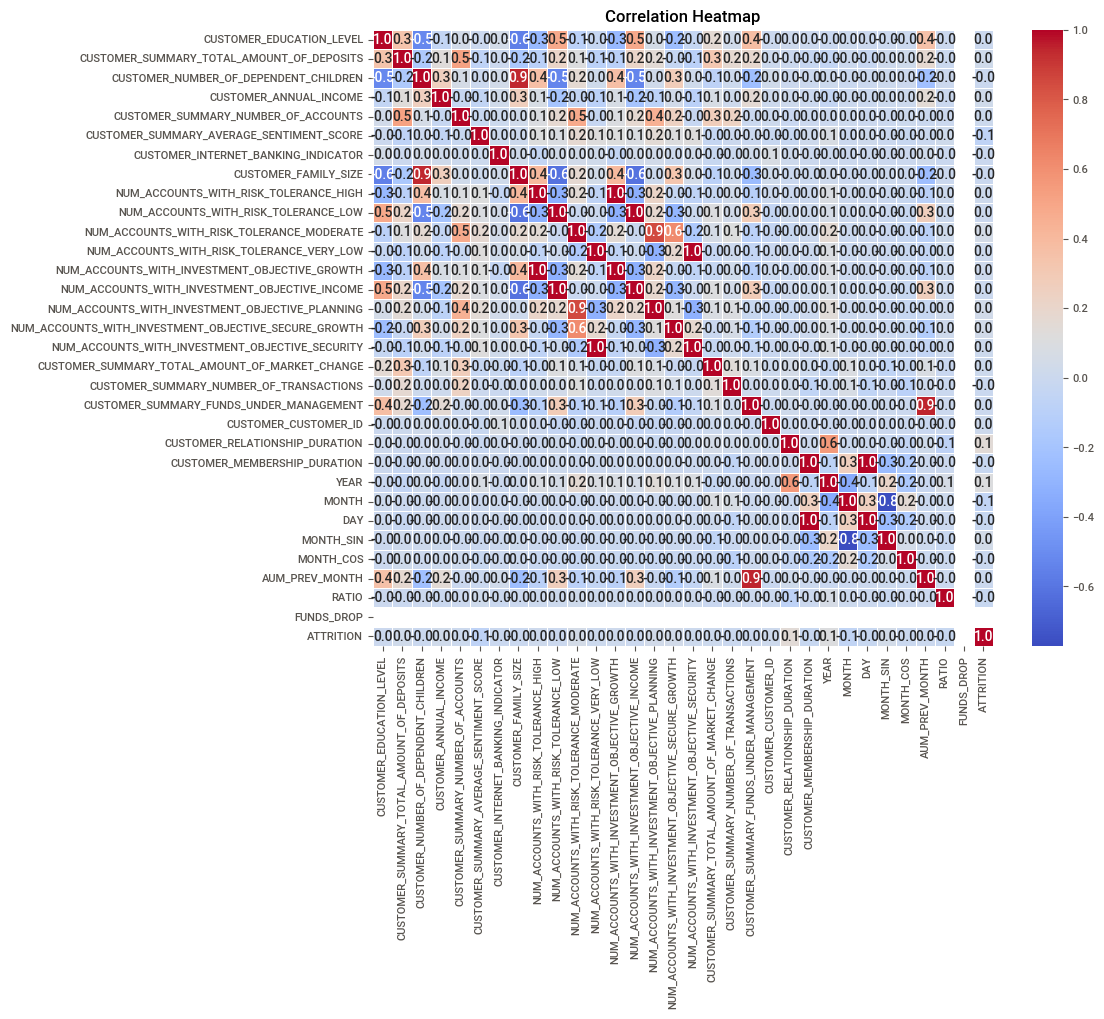

In [42]:
# Create a correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".1f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [43]:
# Using Descriptive Statistics
customer_data.describe().T

,count,mean,std,min,25%,50%,75%,max
CUSTOMER_EDUCATION_LEVEL,19251.0,2.931588,1.407160,1.0,2.000000,3.000000e+00,4.000000,5.000000e+00
CUSTOMER_SUMMARY_TOTAL_AMOUNT_OF_DEPOSITS,19251.0,1067.660024,658.477301,0.0,588.057311,9.583793e+02,1446.427778,4.510451e+03
CUSTOMER_NUMBER_OF_DEPENDENT_CHILDREN,19251.0,0.982235,0.829706,0.0,0.000000,1.000000e+00,2.000000,2.000000e+00
CUSTOMER_ANNUAL_INCOME,19251.0,220653.472547,132121.958480,50000.0,115000.000000,1.850000e+05,315000.000000,7.400000e+05
CUSTOMER_SUMMARY_NUMBER_OF_ACCOUNTS,19251.0,2.611085,0.820364,1.0,2.000000,3.000000e+00,3.000000,4.000000e+00
CUSTOMER_SUMMARY_AVERAGE_SENTIMENT_SCORE,19251.0,2.185133,1.713327,0.0,1.000000,2.000000e+00,4.000000,5.000000e+00
CUSTOMER_INTERNET_BANKING_INDICATOR,19251.0,0.517687,0.499700,0.0,0.000000,1.000000e+00,1.000000,1.000000e+00
CUSTOMER_FAMILY_SIZE,19251.0,2.648226,1.152519,1.0,2.000000,3.000000e+00,4.000000,4.000000e+00
NUM_ACCOUNTS_WITH_RISK_TOLERANCE_HIGH,19251.0,0.333281,0.517520,0.0,0.000000,0.000000e+00,1.000000,2.000000e+00
NUM_ACCOUNTS_WITH_RISK_TOLERANCE_LOW,19251.0,0.298426,0.592356,0.0,0.000000,0.000000e+00,0.000000,2.000000e+00


In [44]:
customer_data.isnull().sum()

CUSTOMER_EDUCATION_LEVEL                                0
CUSTOMER_SUMMARY_TOTAL_AMOUNT_OF_DEPOSITS               0
CUSTOMER_NUMBER_OF_DEPENDENT_CHILDREN                   0
CUSTOMER_ANNUAL_INCOME                                  0
CUSTOMER_SUMMARY_NUMBER_OF_ACCOUNTS                     0
CUSTOMER_SUMMARY_AVERAGE_SENTIMENT_SCORE                0
CUSTOMER_INTERNET_BANKING_INDICATOR                     0
CUSTOMER_FAMILY_SIZE                                    0
NUM_ACCOUNTS_WITH_RISK_TOLERANCE_HIGH                   0
NUM_ACCOUNTS_WITH_RISK_TOLERANCE_LOW                    0
NUM_ACCOUNTS_WITH_RISK_TOLERANCE_MODERATE               0
NUM_ACCOUNTS_WITH_RISK_TOLERANCE_VERY_LOW               0
NUM_ACCOUNTS_WITH_INVESTMENT_OBJECTIVE_GROWTH           0
NUM_ACCOUNTS_WITH_INVESTMENT_OBJECTIVE_INCOME           0
NUM_ACCOUNTS_WITH_INVESTMENT_OBJECTIVE_PLANNING         0
NUM_ACCOUNTS_WITH_INVESTMENT_OBJECTIVE_SECURE_GROWTH    0
NUM_ACCOUNTS_WITH_INVESTMENT_OBJECTIVE_SECURITY         0
CUSTOMER_SUMMA